In [1]:
import csv
import numpy as np
from math import sqrt, pi, sin, cos
import matplotlib.pyplot as plt
from numpy import linspace
import magopacitiesmlk as mo

#makes plots bigger and use Latex fonts
from matplotlib import rcParams
rcParams["figure.dpi"]=600
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 2.5
rcParams['legend.framealpha'] = 1
rcParams['legend.edgecolor'] = 'k'

In [191]:
from importlib import reload
reload(mo)

<module 'magopacitiesmlk' from '/home/mia/Documents/GitHub/HEA-neutrinos/src/magopacitiesmlk.py'>

In [68]:
HBARC = 197.3269718
NEUTRON_MASS = 939.5653 / HBARC
PROTON_MASS = 938.272 / HBARC
MN = 2 * NEUTRON_MASS * PROTON_MASS / (NEUTRON_MASS + PROTON_MASS)
MUON_MASS = 105.7 / HBARC
ELECTRON_MASS = 0.511 / HBARC
GA = 1.267
MEVFM3_TO_GCM3 = 1.78e12
FM4_TO_DYNECM2 = 3.16e35
G15_TO_FM = 19.5 * sqrt(4 * pi / 137) / HBARC**2
COS_TC = sqrt(0.95)
GF = (HBARC / 292800)**2

CC_FACTOR = GF**2 * COS_TC**2 * 10**13
NC_FACTOR = GF**2 * 10**13

In [436]:

data_arr = np.empty((45, 16))
counter = 0
with open('./opacity csvs/ccdata.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    counter = 0
    for row in reader:
        data_arr[counter, :] = np.array([float(elt) for elt in row])
        counter += 1

<>:17: SyntaxWarning: invalid escape sequence '\k'
<>:32: SyntaxWarning: invalid escape sequence '\k'
<>:17: SyntaxWarning: invalid escape sequence '\k'
<>:32: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_340/945636164.py:17: SyntaxWarning: invalid escape sequence '\k'
  ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')
/tmp/ipykernel_340/945636164.py:32: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')


(1e-08, 0.001)

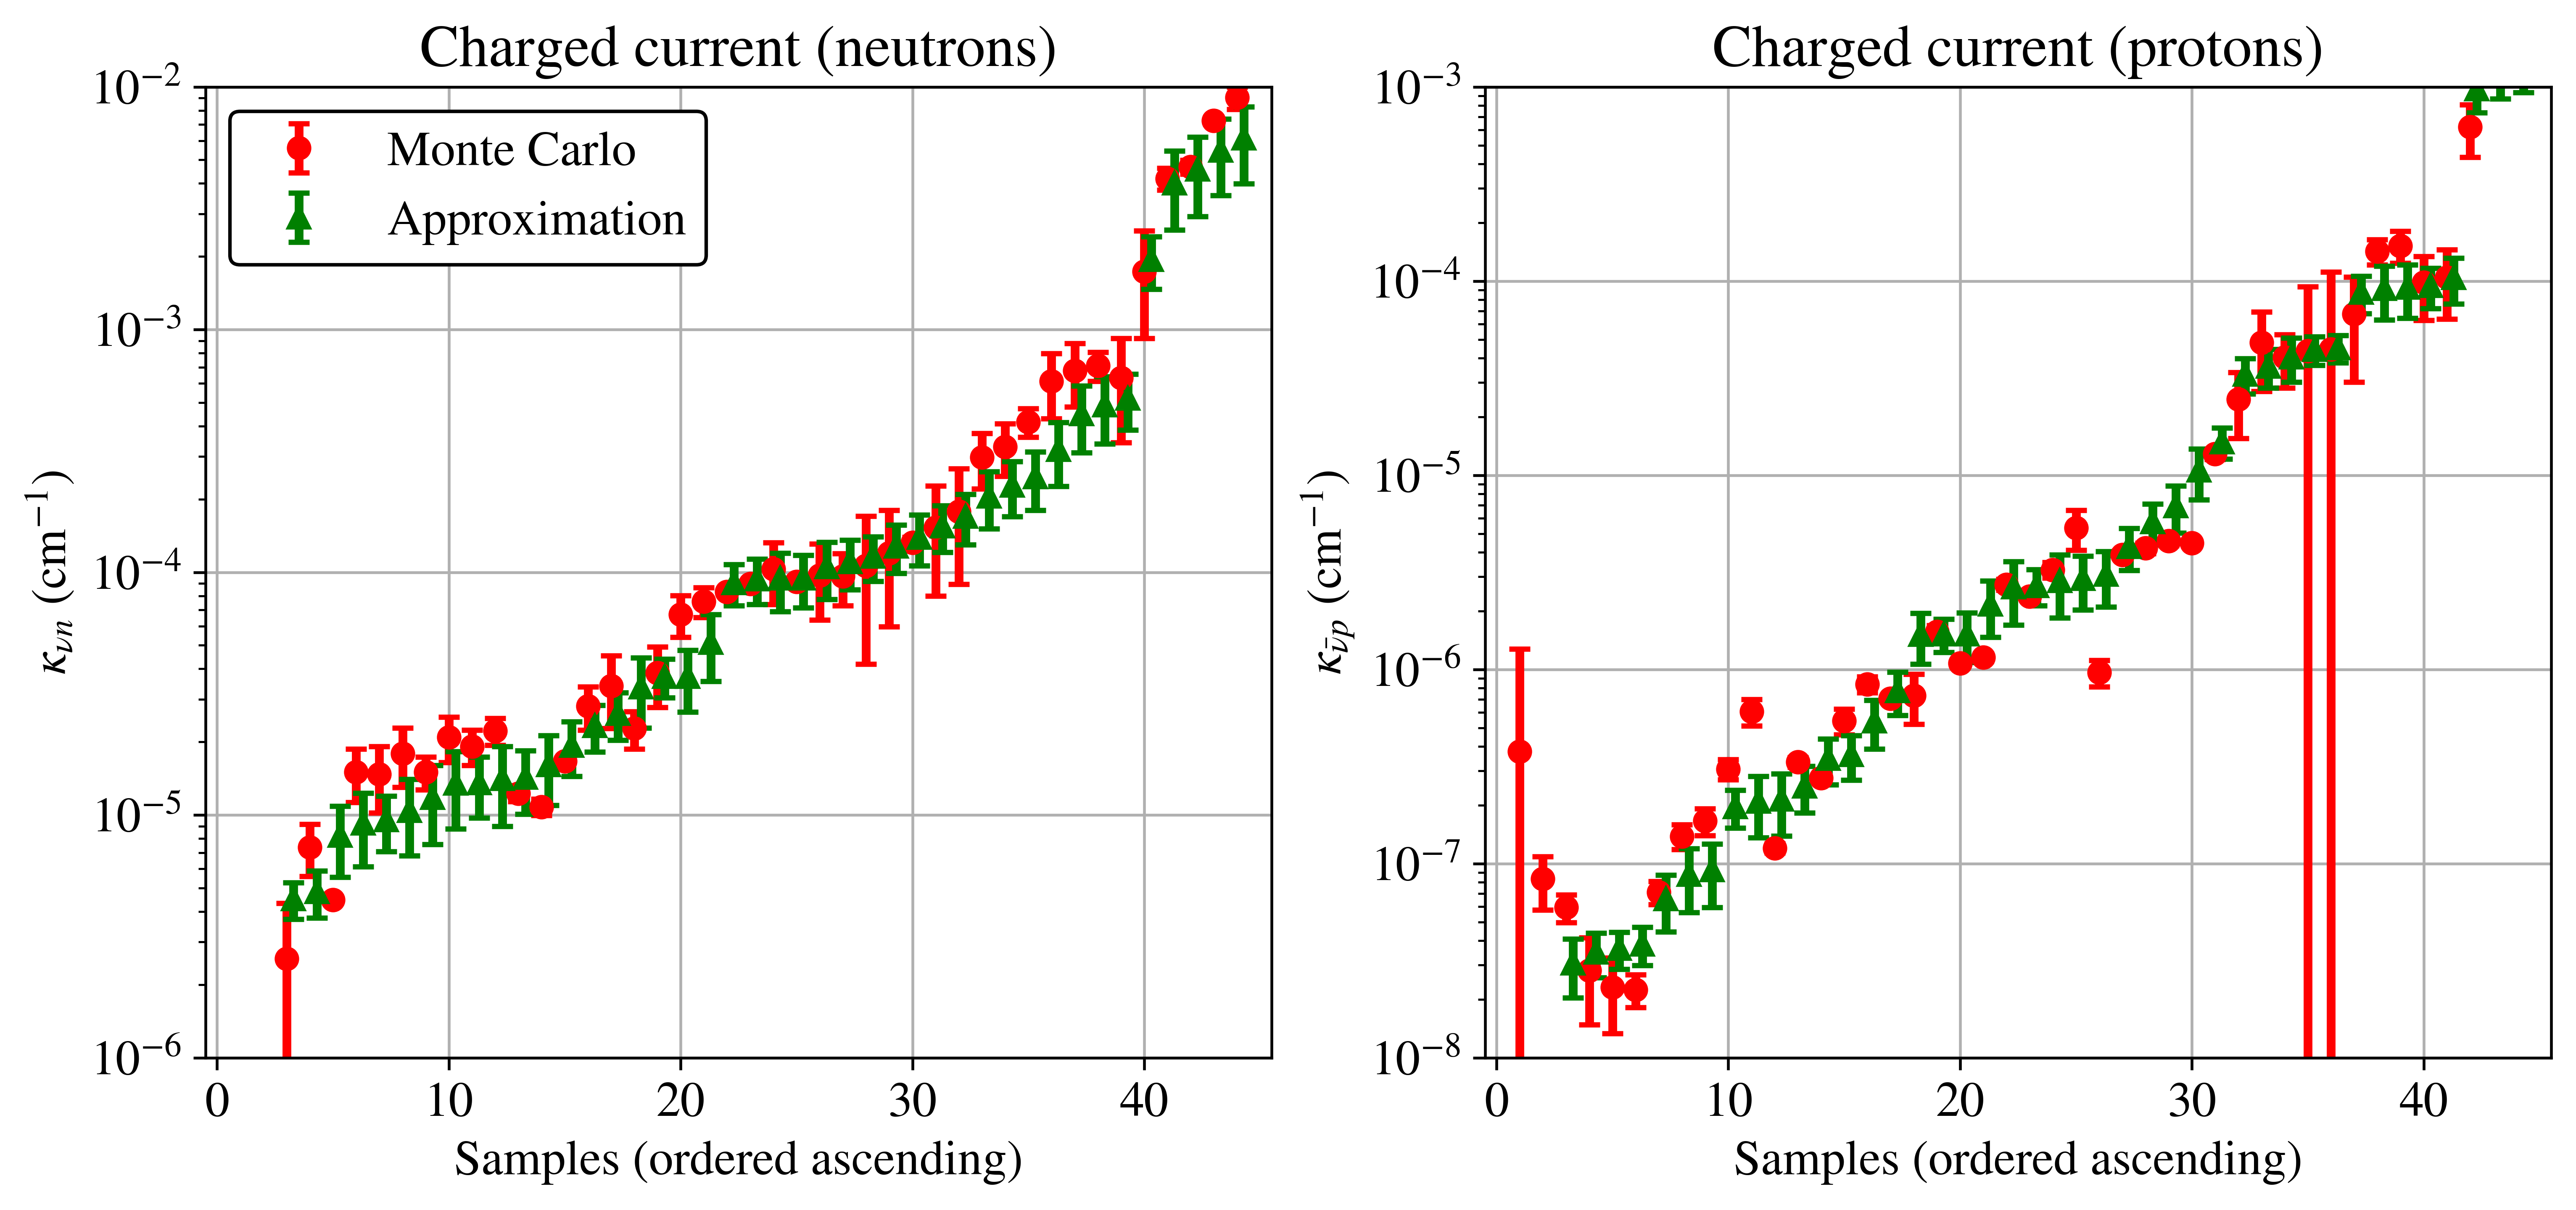

In [437]:
test_ix = 4
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

n_approx = [10**13 * mo.kappan(sorted_data[ix, -8], sorted_data[ix, -7], sorted_data[ix, -6],
    sorted_data[ix, -5], sorted_data[ix, -4], sorted_data[ix, -3], sorted_data[ix, -2], sorted_data[ix, -1], False) for ix in range(45)]
n_approx_err = [elt * sqrt((sorted_data[ix, -7] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(n_approx)]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(45)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0] * GF**2 * COS_TC**2 * 10**13, sorted_data[:, 1] * GF**2 * COS_TC**2 * 10**13, fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], n_approx, n_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)
ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')

test_ix = 6
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]

p_approx = [10**13 * mo.kappap(sorted_data[ix, -8], sorted_data[ix, -7], sorted_data[ix, -6],
    sorted_data[ix, -5], sorted_data[ix, -4], sorted_data[ix, -3], sorted_data[ix, -2], sorted_data[ix, -1], False) for ix in range(45)]
p_approx_err = [elt * sqrt((sorted_data[ix, -7] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(p_approx)]

xpts = range(45) #sorted_data[:, test_ix] * HBARC
ax2.errorbar(xpts, sorted_data[:, 2] * GF**2 * COS_TC**2 * 10**13, sorted_data[:, 3] * GF**2 * COS_TC**2 * 10**13, fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], p_approx, p_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)
ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 45.5])
ax2.set_xlim([-0.5, 45.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Charged current (neutrons)')
ax2.set_title('Charged current (protons)')
ax1.set_ylim([1e-6, 1e-2])
ax2.set_ylim([1e-8, 1e-3])

<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_340/1403776783.py:23: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_340/1403776783.py:26: SyntaxWarning: invalid escape sequence '\k'
  plt.legend(['$\\bar{\\nu} + p \\rightarrow n + e^+$', '$\\nu + n \\rightarrow p + e$'], title = '$\kappa_{\\nu n } $' + f': $\chi^2 / N$ = {nchi:.2f}' + '\n' + '$\kappa_{\\bar{\\nu} p } $' + f': $\chi^2 / N$ = {pchi:.2f}')
/tmp/ipykernel_340/1403776783.py:26: SyntaxWarning: invalid escape sequence '\

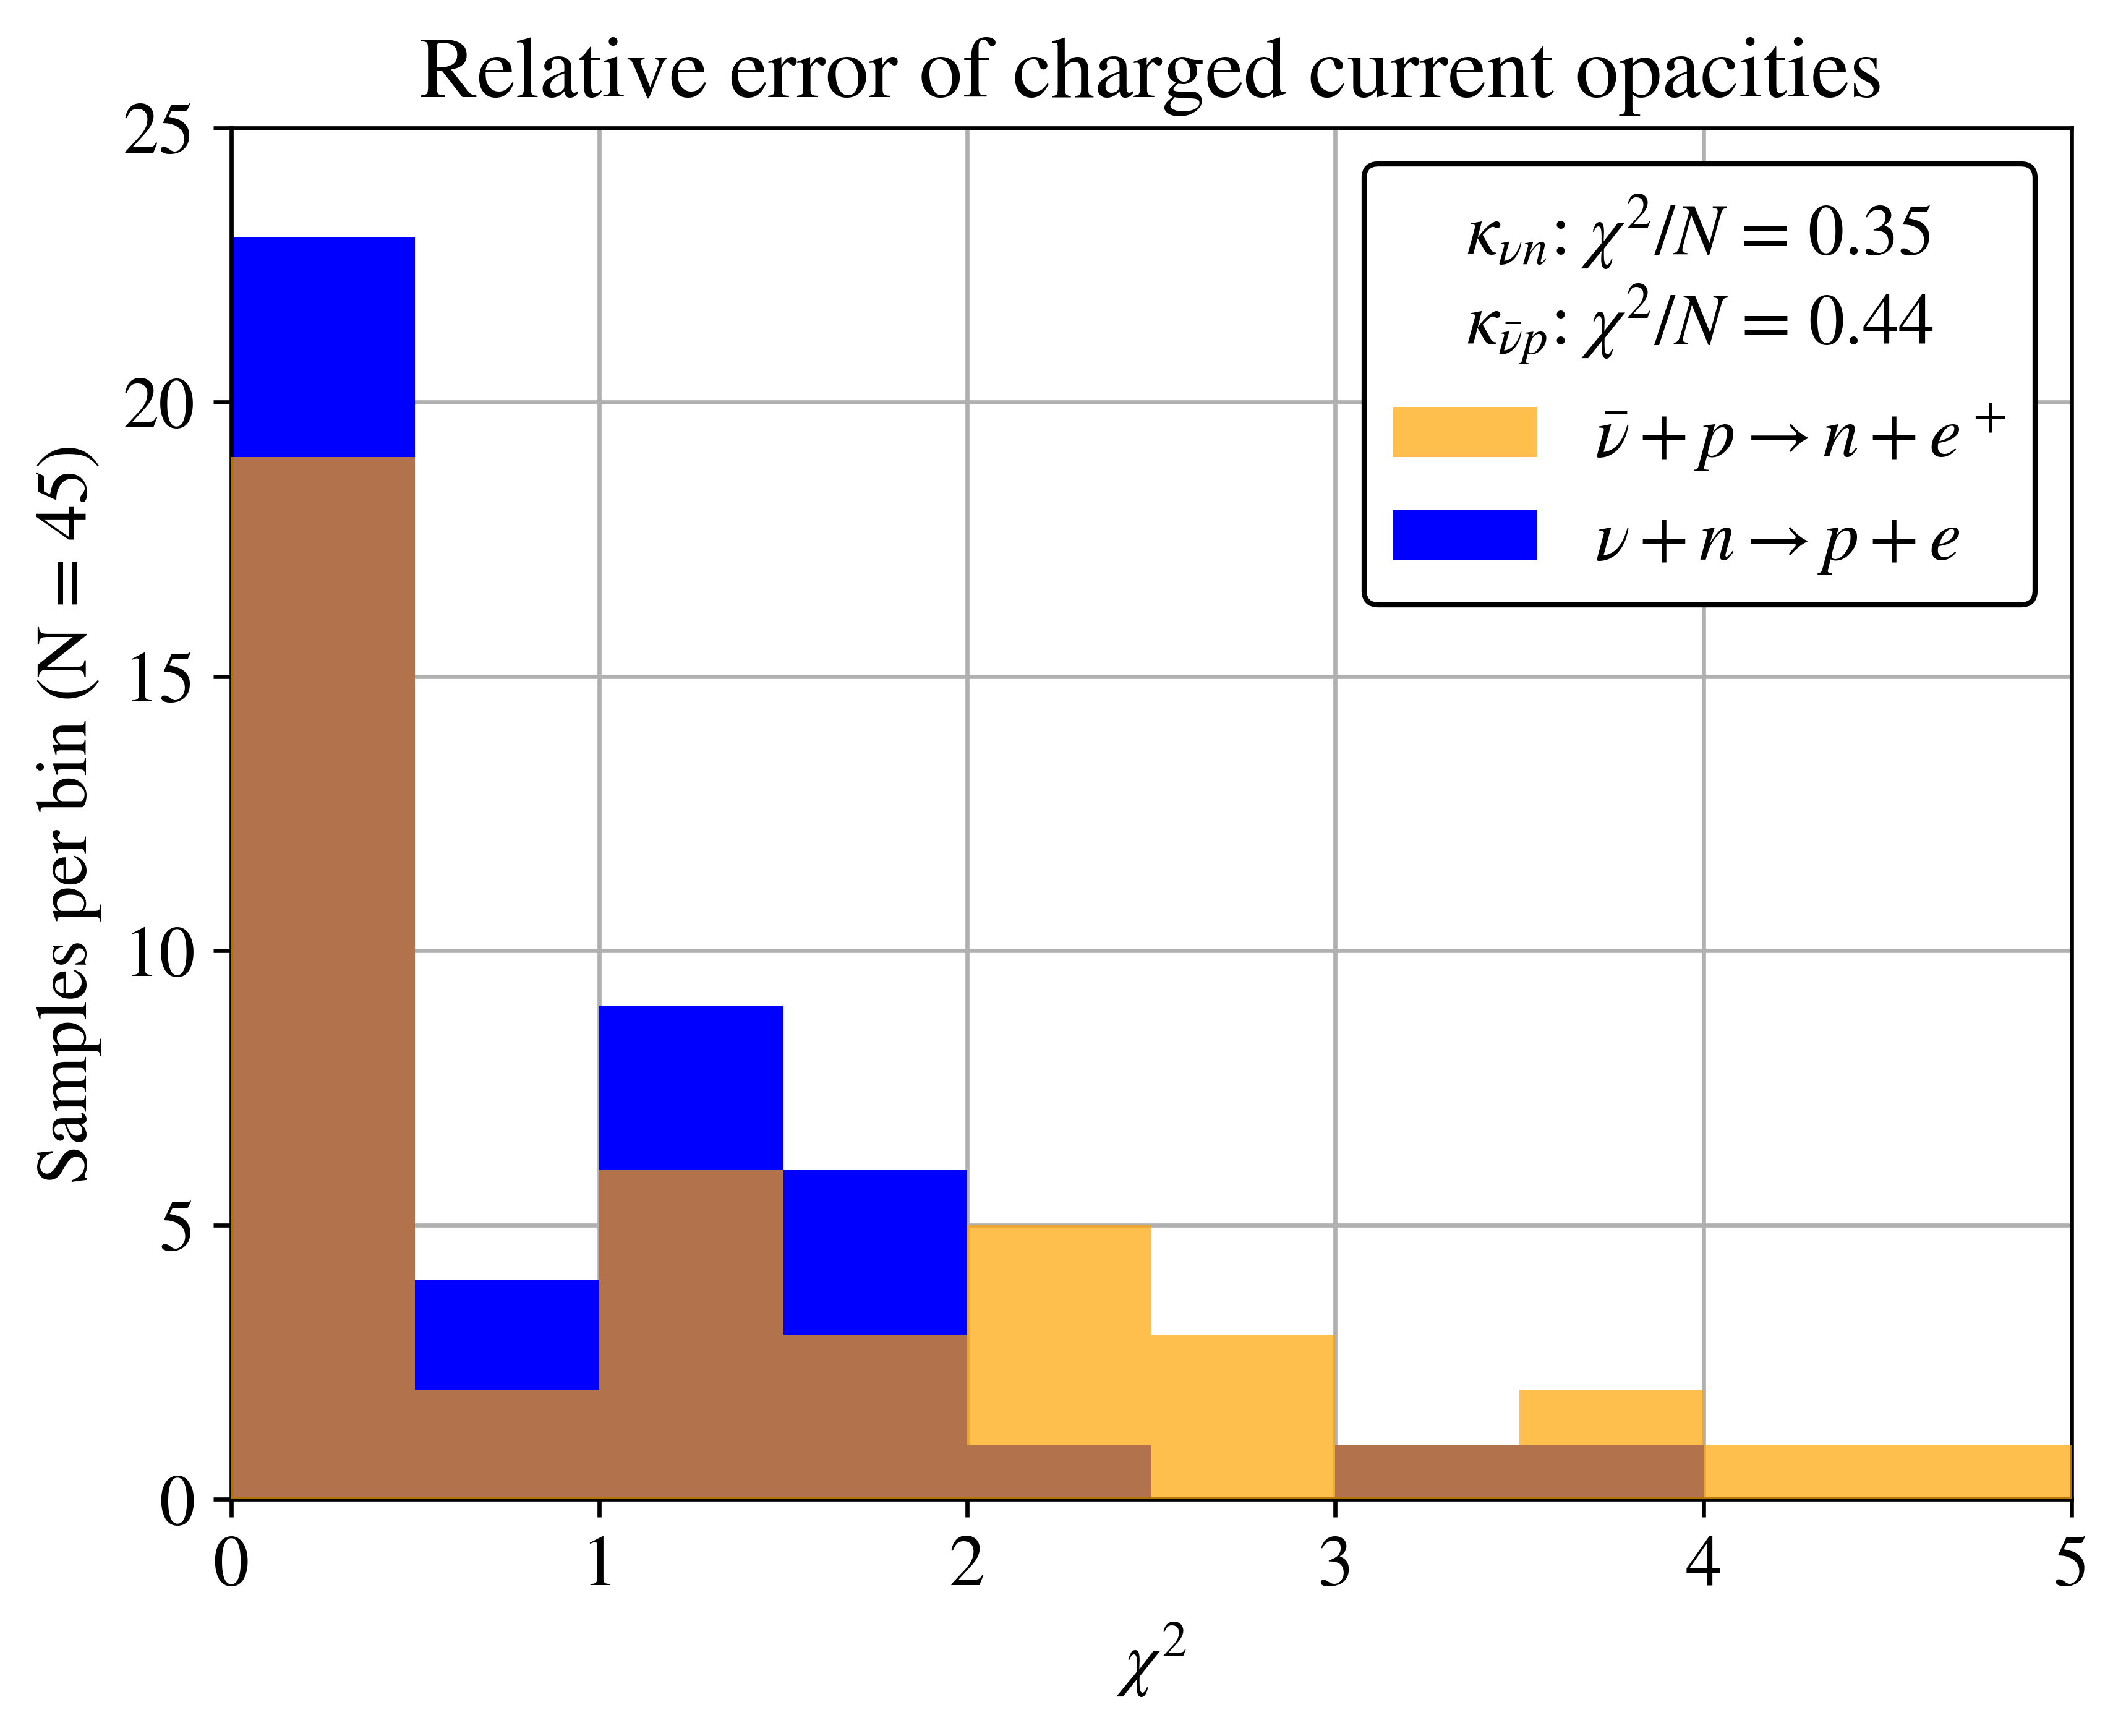

In [438]:
test_ix = 4
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

chisq_ncc = (sorted_data[:, 0] * GF**2 * COS_TC**2 * 10**13 - np.array(n_approx))**2 / ((sorted_data[:, 1] * GF**2 * COS_TC**2 * 10**13)**2 + np.array(n_approx_err)**2)

test_ix = 6
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]

chisq_pcc = (sorted_data[:, 2] * GF**2 * COS_TC**2 * 10**13 - np.array(p_approx))**2 / ((sorted_data[:, 3] * GF**2 * COS_TC**2 * 10**13)**2 + np.array(p_approx_err)**2)

nchicc = np.sum(chisq_n) / 45
pchicc = np.sum(chisq_p) / 45

plt.hist(chisq_pcc, bins = 40, range = [0, 20], color = 'orange', alpha = 0.7, zorder = 3)
plt.hist(chisq_ncc, bins = 40, range = [0, 20], color = 'blue', zorder = 2)
plt.xlim([0, 5])
plt.ylim([0, 25])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin (N = 45)')
plt.title('Relative error of charged current opacities')
plt.legend(['$\\bar{\\nu} + p \\rightarrow n + e^+$', '$\\nu + n \\rightarrow p + e$'], title = '$\kappa_{\\nu n } $' + f': $\chi^2 / N$ = {nchi:.2f}' + '\n' + '$\kappa_{\\bar{\\nu} p } $' + f': $\chi^2 / N$ = {pchi:.2f}')


In [301]:
ncdata_arr = np.empty((54, 27))
counter = 0
with open('./opacity csvs/ncdata.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    counter = 0
    for row in reader:
        ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
        counter += 1

<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:39: SyntaxWarning: invalid escape sequence '\k'
<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:39: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_340/660798235.py:38: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$\partial^2 \kappa_{NCn}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{-1}$ MeV$^{-1}$)')
/tmp/ipykernel_340/660798235.py:39: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')


(1e-08, 0.0001)

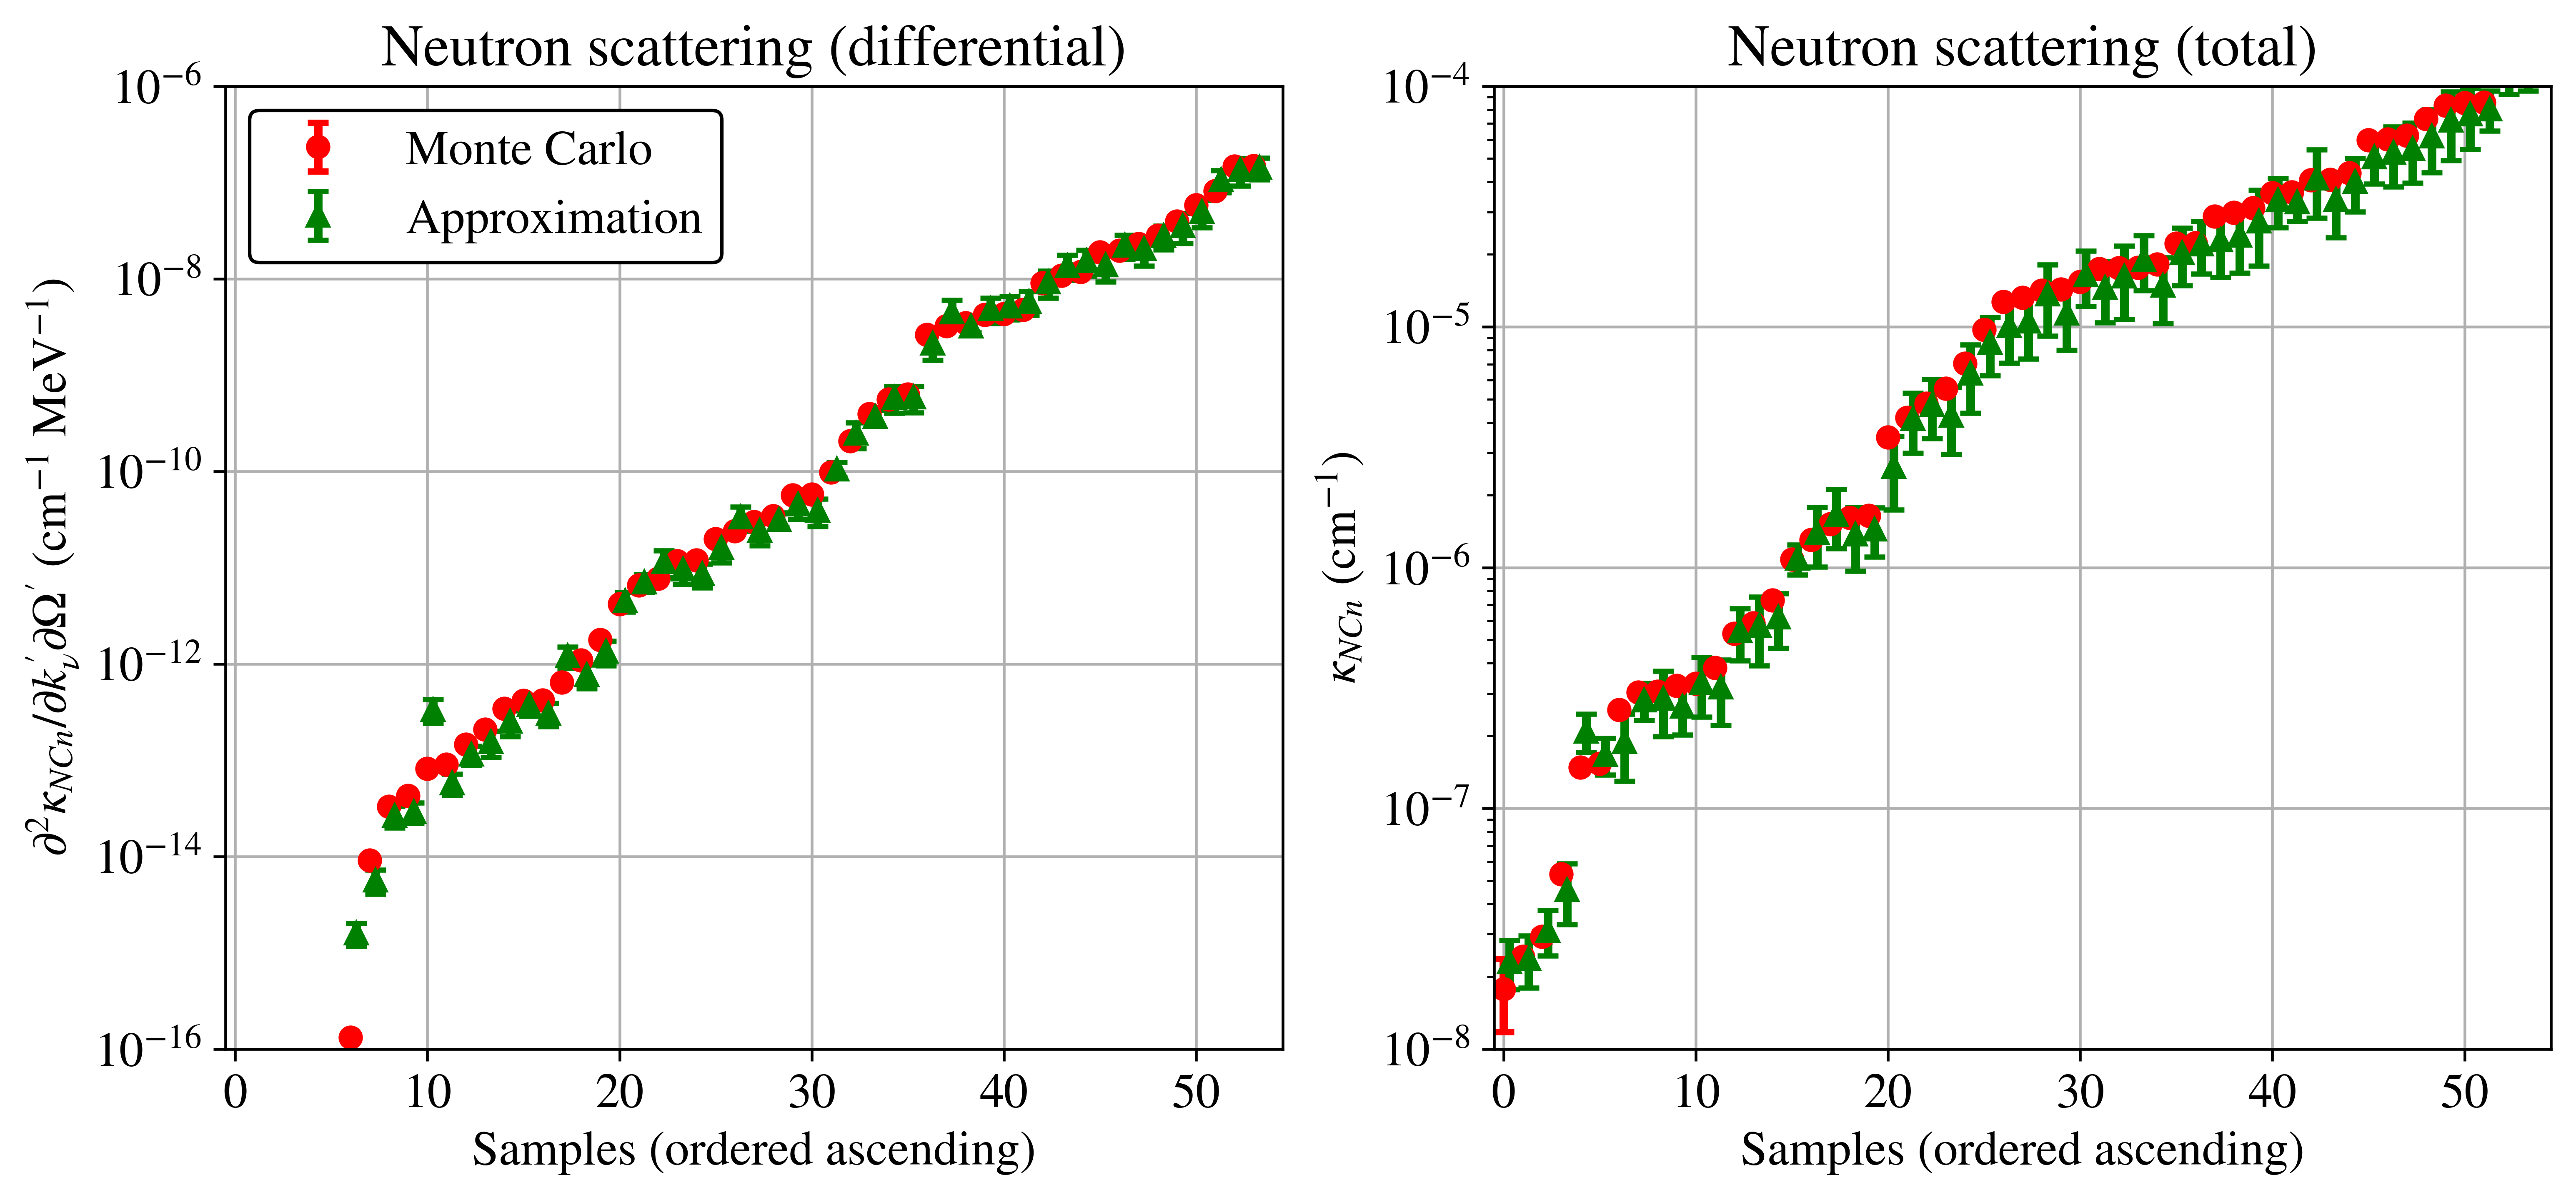

In [267]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax

test_ix = 0
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

dn_approx = [10**13 / HBARC * mo.kappan_nc_diff(sorted_data[ix, -10], sorted_data[ix, -9], (1 - sorted_data[ix, -6]) * sorted_data[ix, -7],
    sorted_data[ix, -5], sorted_data[ix, -4], sorted_data[ix, -3], sorted_data[ix, -2], sorted_data[ix, -1]) for ix in range(54)]
dn_approx_err = [elt * sqrt((sorted_data[ix, -9] + sorted_data[ix, -5] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(dn_approx)]

chisq_dn = (sorted_data[:, 0] * GF**2 * 10**13 / HBARC - np.array(dn_approx))**2 / ((sorted_data[:, 1] * GF**2 * 10**13 / HBARC)**2 + np.array(dn_approx_err)**2)
chisq_dn_lim = chisq_dn[sorted_data[:, 0] * GF**2 * 10**13 / HBARC > 10**-20]

xpts = range(54)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0] * GF**2 * 10**13 / HBARC, sorted_data[:, 1] * GF**2 * 10**13 / HBARC, fmt = 'ro', capsize = 3, capthick = 1.8)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], dn_approx, dn_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)

test_ix = 2
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]
xpts = range(54) #sorted_data[:, test_ix] * HBARC

n_approx = [10**13 * mo.kappan_nc(sorted_data[ix, -10], sorted_data[ix, -9], (1 - sorted_data[ix, -6]) * sorted_data[ix, -7],
    sorted_data[ix, -5], sorted_data[ix, -4]) for ix in range(len(sorted_data[:, 0]))]
n_approx_err = [elt * sqrt((sorted_data[ix, -9] + sorted_data[ix, -5] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(n_approx)]

chisq_n = (sorted_data[:, 2] * GF**2 * 10**13 - np.array(n_approx))**2 / ((sorted_data[:, 3] * GF**2 * 10**13)**2 + np.array(n_approx_err)**2)

ax2.errorbar(xpts, sorted_data[:, 2] * GF**2 * 10**13, sorted_data[:, 3] * GF**2 * 10**13, fmt = 'ro', capsize = 3, capthick = 1.8)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], n_approx, n_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)

ax1.set_ylabel('$\partial^2 \kappa_{NCn}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{-1}$ MeV$^{-1}$)')
ax2.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 54.5])
ax2.set_xlim([-0.5, 54.5])
#ax2.set_xlim([-0.6, 3.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Neutron scattering (differential)')
ax2.set_title('Neutron scattering (total)')
ax1.set_ylim([1e-16, 1e-6])
ax2.set_ylim([1e-8, 1e-4])

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:18: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_340/1887994395.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_340/1887994395.py:18: SyntaxWarning: invalid escape sequence '\c'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dnchi:.2f}'  + '\n' + 'Diff ($\kappa > 10^{-20} cm^{-1}$): $\chi^2 / N$' + f' = {dnchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {nchi:.2f}')
/tmp/ipykernel_340/1887994395.py:18: SyntaxWarning: invalid escape sequence '\k'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 /

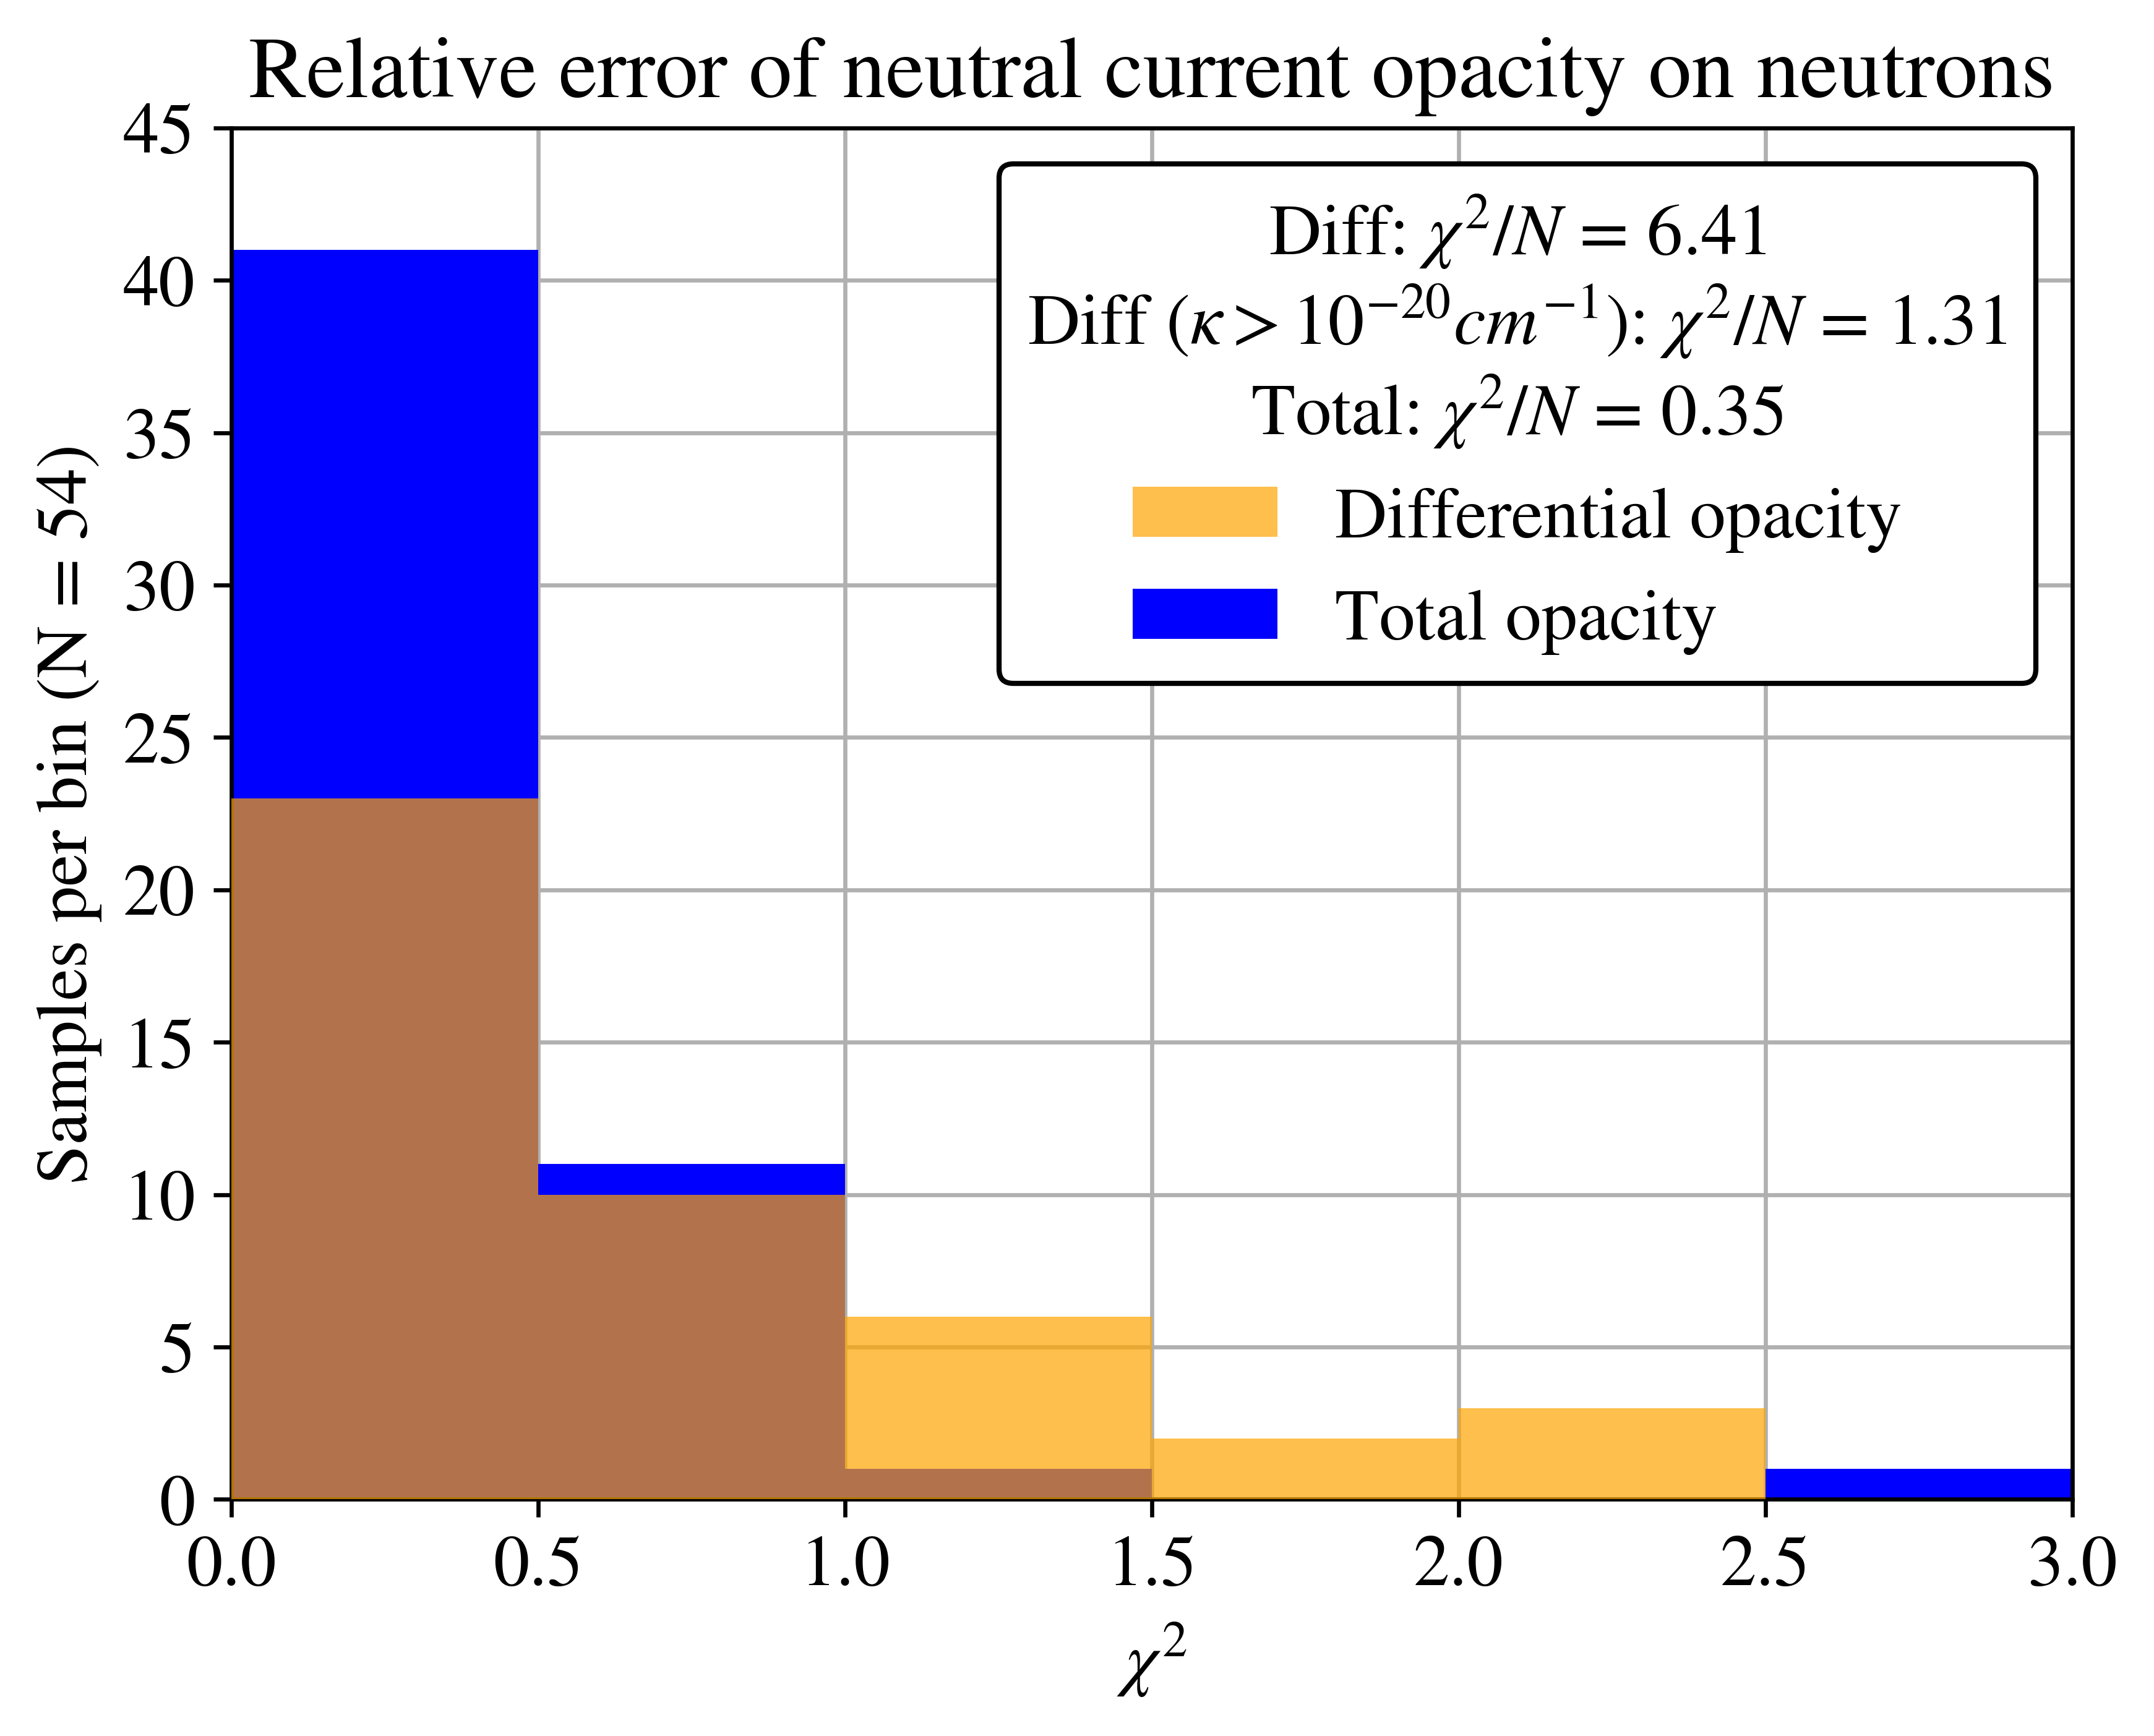

In [275]:
#results csvs have cc of the form
#mean dn, std dev dn, mean n, std dev n, mean dp, std dev dp, mean p, std dev p, mean e, std dev e, dn, n, dndegen, ndegen, dp, p, e, eb, t, mue, nb, yp, k, cost, k', cost', phi

dnchi_lim = np.average(chisq_dn_lim) 
nchi = np.average(chisq_n) 
dnchi = np.average(chisq_dn)

plt.hist(chisq_dn, bins = 40, range = [0, 20], color = 'orange', alpha = 0.7, zorder = 3)
plt.hist(chisq_n, bins = 40, range = [0, 20], color = 'blue', zorder = 2)
plt.xlim([0, 3])
plt.ylim([0, 45])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin (N = 54)')
#plt.text(11, 40, , fontsize = 20)
#plt.text(11, 34, f'Total: $\chi^2 / N$ = {nchi:.2f}', fontsize = 20)
plt.title('Relative error of neutral current opacity on neutrons')
leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dnchi:.2f}'  + '\n' + 'Diff ($\kappa > 10^{-20} cm^{-1}$): $\chi^2 / N$' + f' = {dnchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {nchi:.2f}')

leg.get_title().set_multialignment('center')
leg.get_title().set_ha('center')


In [427]:
reload(mo)

<module 'magopacitiesmlk' from '/home/mia/Documents/GitHub/HEA-neutrinos/src/magopacitiesmlk.py'>

<>:39: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\k'
<>:39: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_340/384760503.py:39: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$\partial^2 \kappa_{NCp}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{-1}$ MeV$^{-1}$)')
/tmp/ipykernel_340/384760503.py:40: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')


(1e-09, 5e-05)

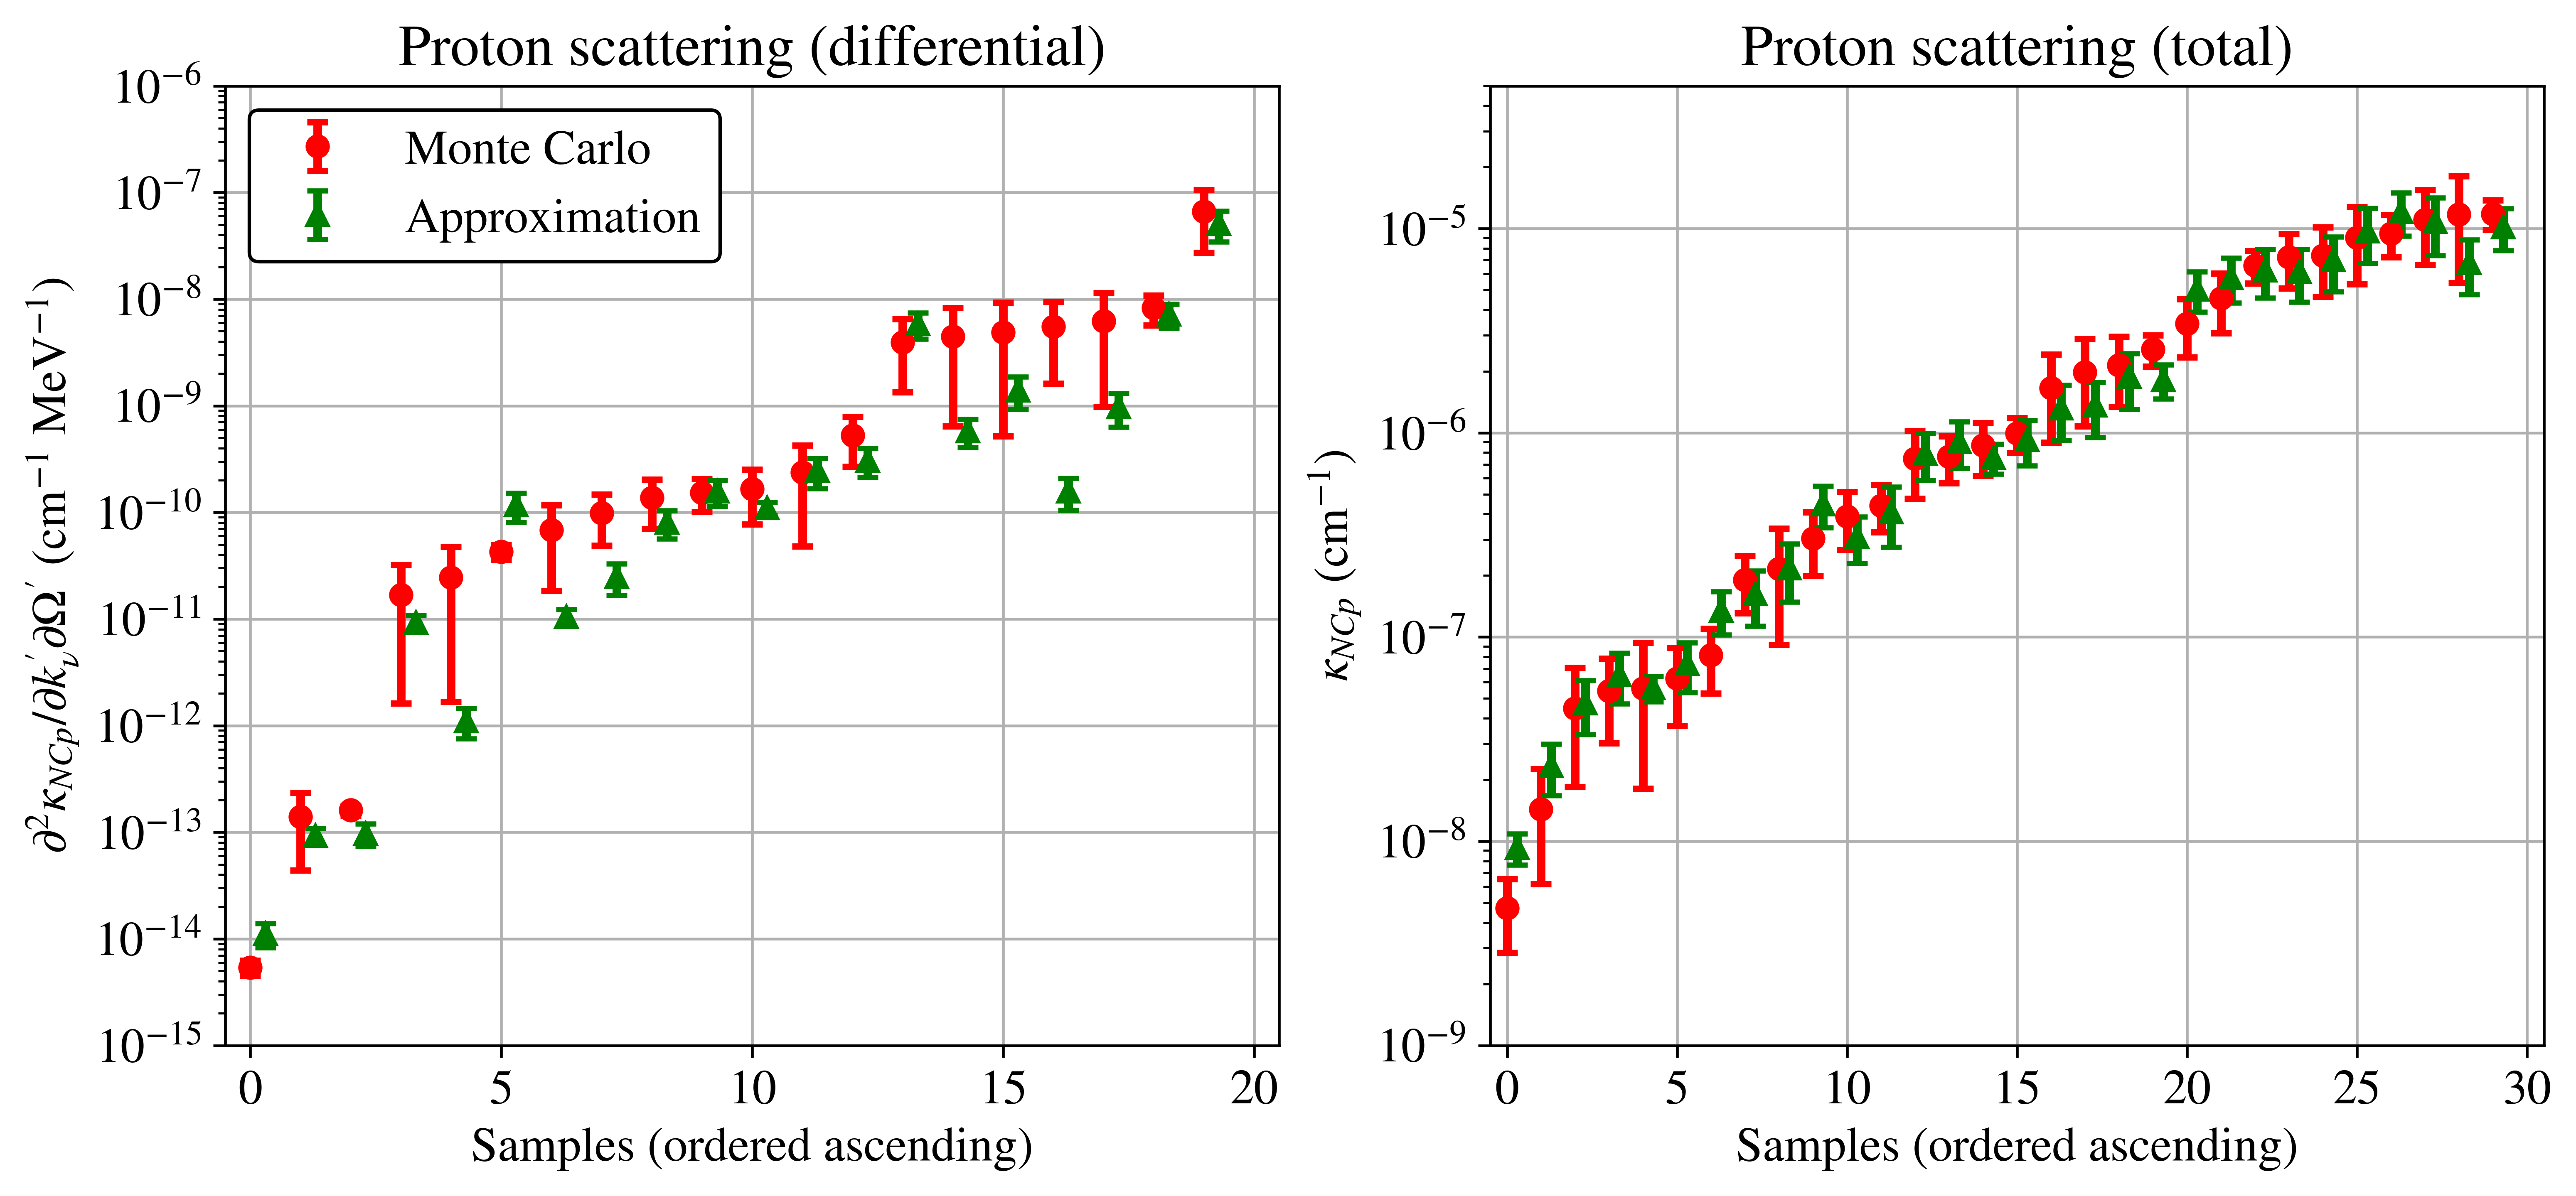

In [434]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax

test_ix = 4
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] 
isdegen = np.logical_and(sorted_both[:, 4] > sorted_both[:, 5], 100 > sorted_both[:, 4])
sorted_data = sorted_both[isdegen]

dp_approx = [10**13 / HBARC * mo.kappap_nc_diff(sorted_data[ix, -10], sorted_data[ix, -9], sorted_data[ix, -6] * sorted_data[ix, -7],
    sorted_data[ix, -5], sorted_data[ix, -4], sorted_data[ix, -3], sorted_data[ix, -2], sorted_data[ix, -1]) for ix in range(len(sorted_data[:, 0]))]
dp_approx_err = [elt * sqrt((sorted_data[ix, -9] + sorted_data[ix, -5] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(dp_approx)]

chisq_dp = (sorted_data[:, 4] * GF**2 * 10**13 / (2 * HBARC) - np.array(dp_approx))**2 / ((sorted_data[:, 5] * GF**2 * 10**13 / (2 *HBARC))**2 + np.array(dp_approx_err)**2)
chisq_dp_lim = chisq_dp[sorted_data[:, 4] * GF**2 * 10**13 / (2 * HBARC) > 10**-20]

xpts = range(len(sorted_data[:, 0]))#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts[:-7], sorted_data[7:, 4] * GF**2 * 10**13 / (2 * HBARC), sorted_data[7:, 5] * GF**2 * 10**13 / (2 * HBARC), fmt = 'ro', capsize = 3, capthick = 1.8)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts][:-7], dp_approx[7:], dp_approx_err[7:], fmt = 'g^', capsize = 3, capthick = 1.5)
#ax1.plot(xpts, sorted_data[:, 14] * GF**2 * 10**13 / (2 * HBARC), 'x')

test_ix = 6
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = np.logical_and(sorted_both[:, 6] > sorted_both[:, 7], 100 > sorted_both[:, 6])
sorted_data = sorted_both[isdegen]
xpts = range(len(sorted_data[:, 0]))

p_approx = [10**13 * mo.kappap_nc(sorted_data[ix, -10], sorted_data[ix, -9], sorted_data[ix, -6] * sorted_data[ix, -7],
    sorted_data[ix, -5], sorted_data[ix, -4]) for ix in range(len(sorted_data[:, 0]))]
p_approx_err = [elt * sqrt((sorted_data[ix, -9] + sorted_data[ix, -5] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(p_approx)]

chisq_p = (sorted_data[:, 6] * GF**2 * 10**13 / 2 - np.array(p_approx))**2 / ((sorted_data[:, 7] * GF**2 * 10**13 / 2)**2 + np.array(p_approx_err)**2)

ax2.errorbar(xpts, sorted_data[:, 6] * GF**2 * 10**13 / 2, sorted_data[:, 7] * GF**2 * 10**13 / 2, fmt = 'ro', capsize = 3, capthick = 1.8)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], p_approx, p_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)

ax1.set_ylabel('$\partial^2 \kappa_{NCp}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{-1}$ MeV$^{-1}$)')
ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 20.5])
ax2.set_xlim([-0.5, 30.5])
#ax2.set_xlim([-0.6, 3.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Proton scattering (differential)')
ax2.set_title('Proton scattering (total)')
ax1.set_ylim([1e-15, 1e-6])
ax2.set_ylim([1e-9, 5e-5])

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:18: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_340/3520167550.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_340/3520167550.py:18: SyntaxWarning: invalid escape sequence '\c'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dpchi:.2f}'  + '\n' + 'Diff ($\kappa > 10^{-20}$ cm$^{-1}$ MeV$^{-1}$): $\chi^2 / N$' + f' = {dpchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {pchi:.2f}')
/tmp/ipykernel_340/3520167550.py:18: SyntaxWarning: invalid escape sequence '\k'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Di

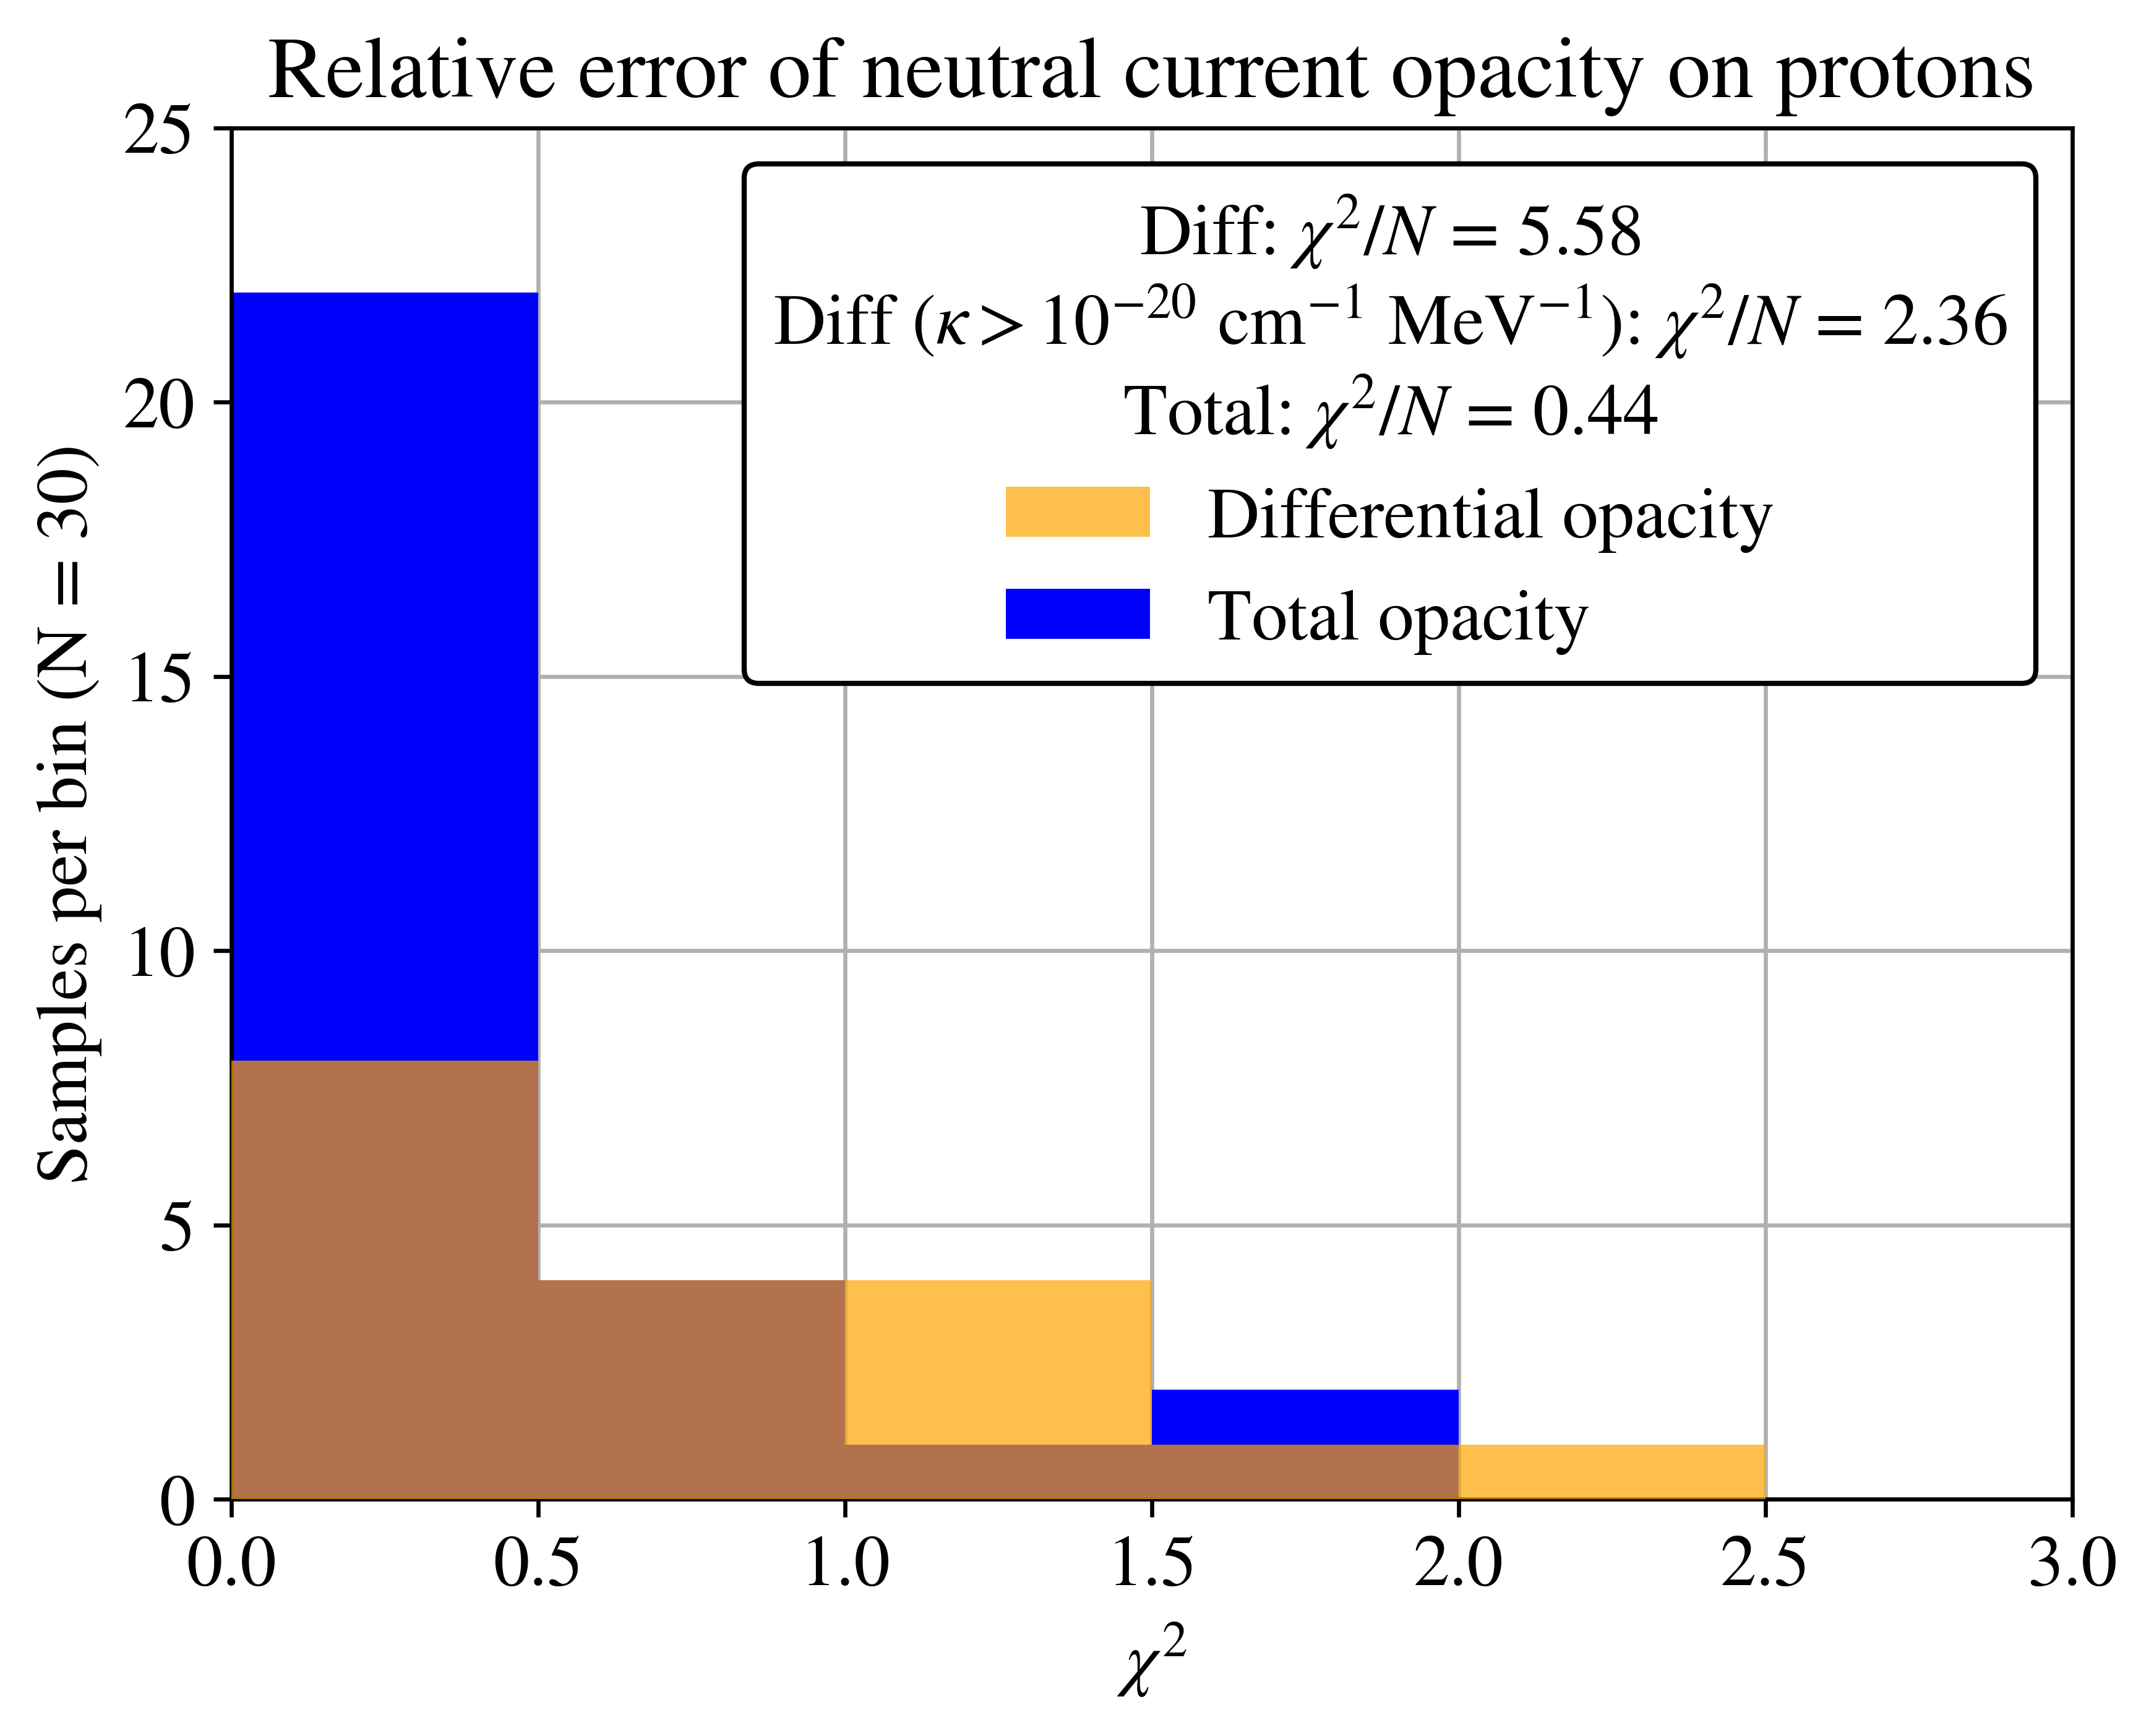

In [433]:
#results csvs have cc of the form
#mean dn, std dev dn, mean n, std dev n, mean dp, std dev dp, mean p, std dev p, mean e, std dev e, dn, n, dndegen, ndegen, dp, p, e, eb, t, mue, nb, yp, k, cost, k', cost', phi

dpchi_lim = np.average(chisq_dp_lim) 
pchi = np.average(chisq_p) 
dpchi = np.average(chisq_dp)

plt.hist(chisq_dp, bins = 40, range = [0, 20], color = 'orange', alpha = 0.7, zorder = 3)
plt.hist(chisq_p, bins = 40, range = [0, 20], color = 'blue', zorder = 2)
plt.xlim([0, 3])
plt.ylim([0, 25])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin (N = 30)')
#plt.text(11, 40, , fontsize = 20)
#plt.text(11, 34, f'Total: $\chi^2 / N$ = {nchi:.2f}', fontsize = 20)
plt.title('Relative error of neutral current opacity on protons')
leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dpchi:.2f}'  + '\n' + 'Diff ($\kappa > 10^{-20}$ cm$^{-1}$ MeV$^{-1}$): $\chi^2 / N$' + f' = {dpchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {pchi:.2f}')

leg.get_title().set_multialignment('center')
leg.get_title().set_ha('center')


<>:29: SyntaxWarning: invalid escape sequence '\k'
<>:30: SyntaxWarning: invalid escape sequence '\k'
<>:29: SyntaxWarning: invalid escape sequence '\k'
<>:30: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_268/3712222044.py:29: SyntaxWarning: invalid escape sequence '\k'
  ax1.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')
/tmp/ipykernel_268/3712222044.py:30: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
/tmp/ipykernel_268/3712222044.py:19: RuntimeWarning: invalid value encountered in subtract
  isdegen = np.logical_and(sorted_both[:, 6] - sorted_both[:, 7] > 0, sorted_both[:, 6] < 10**10)


(1e-08, 0.0001)

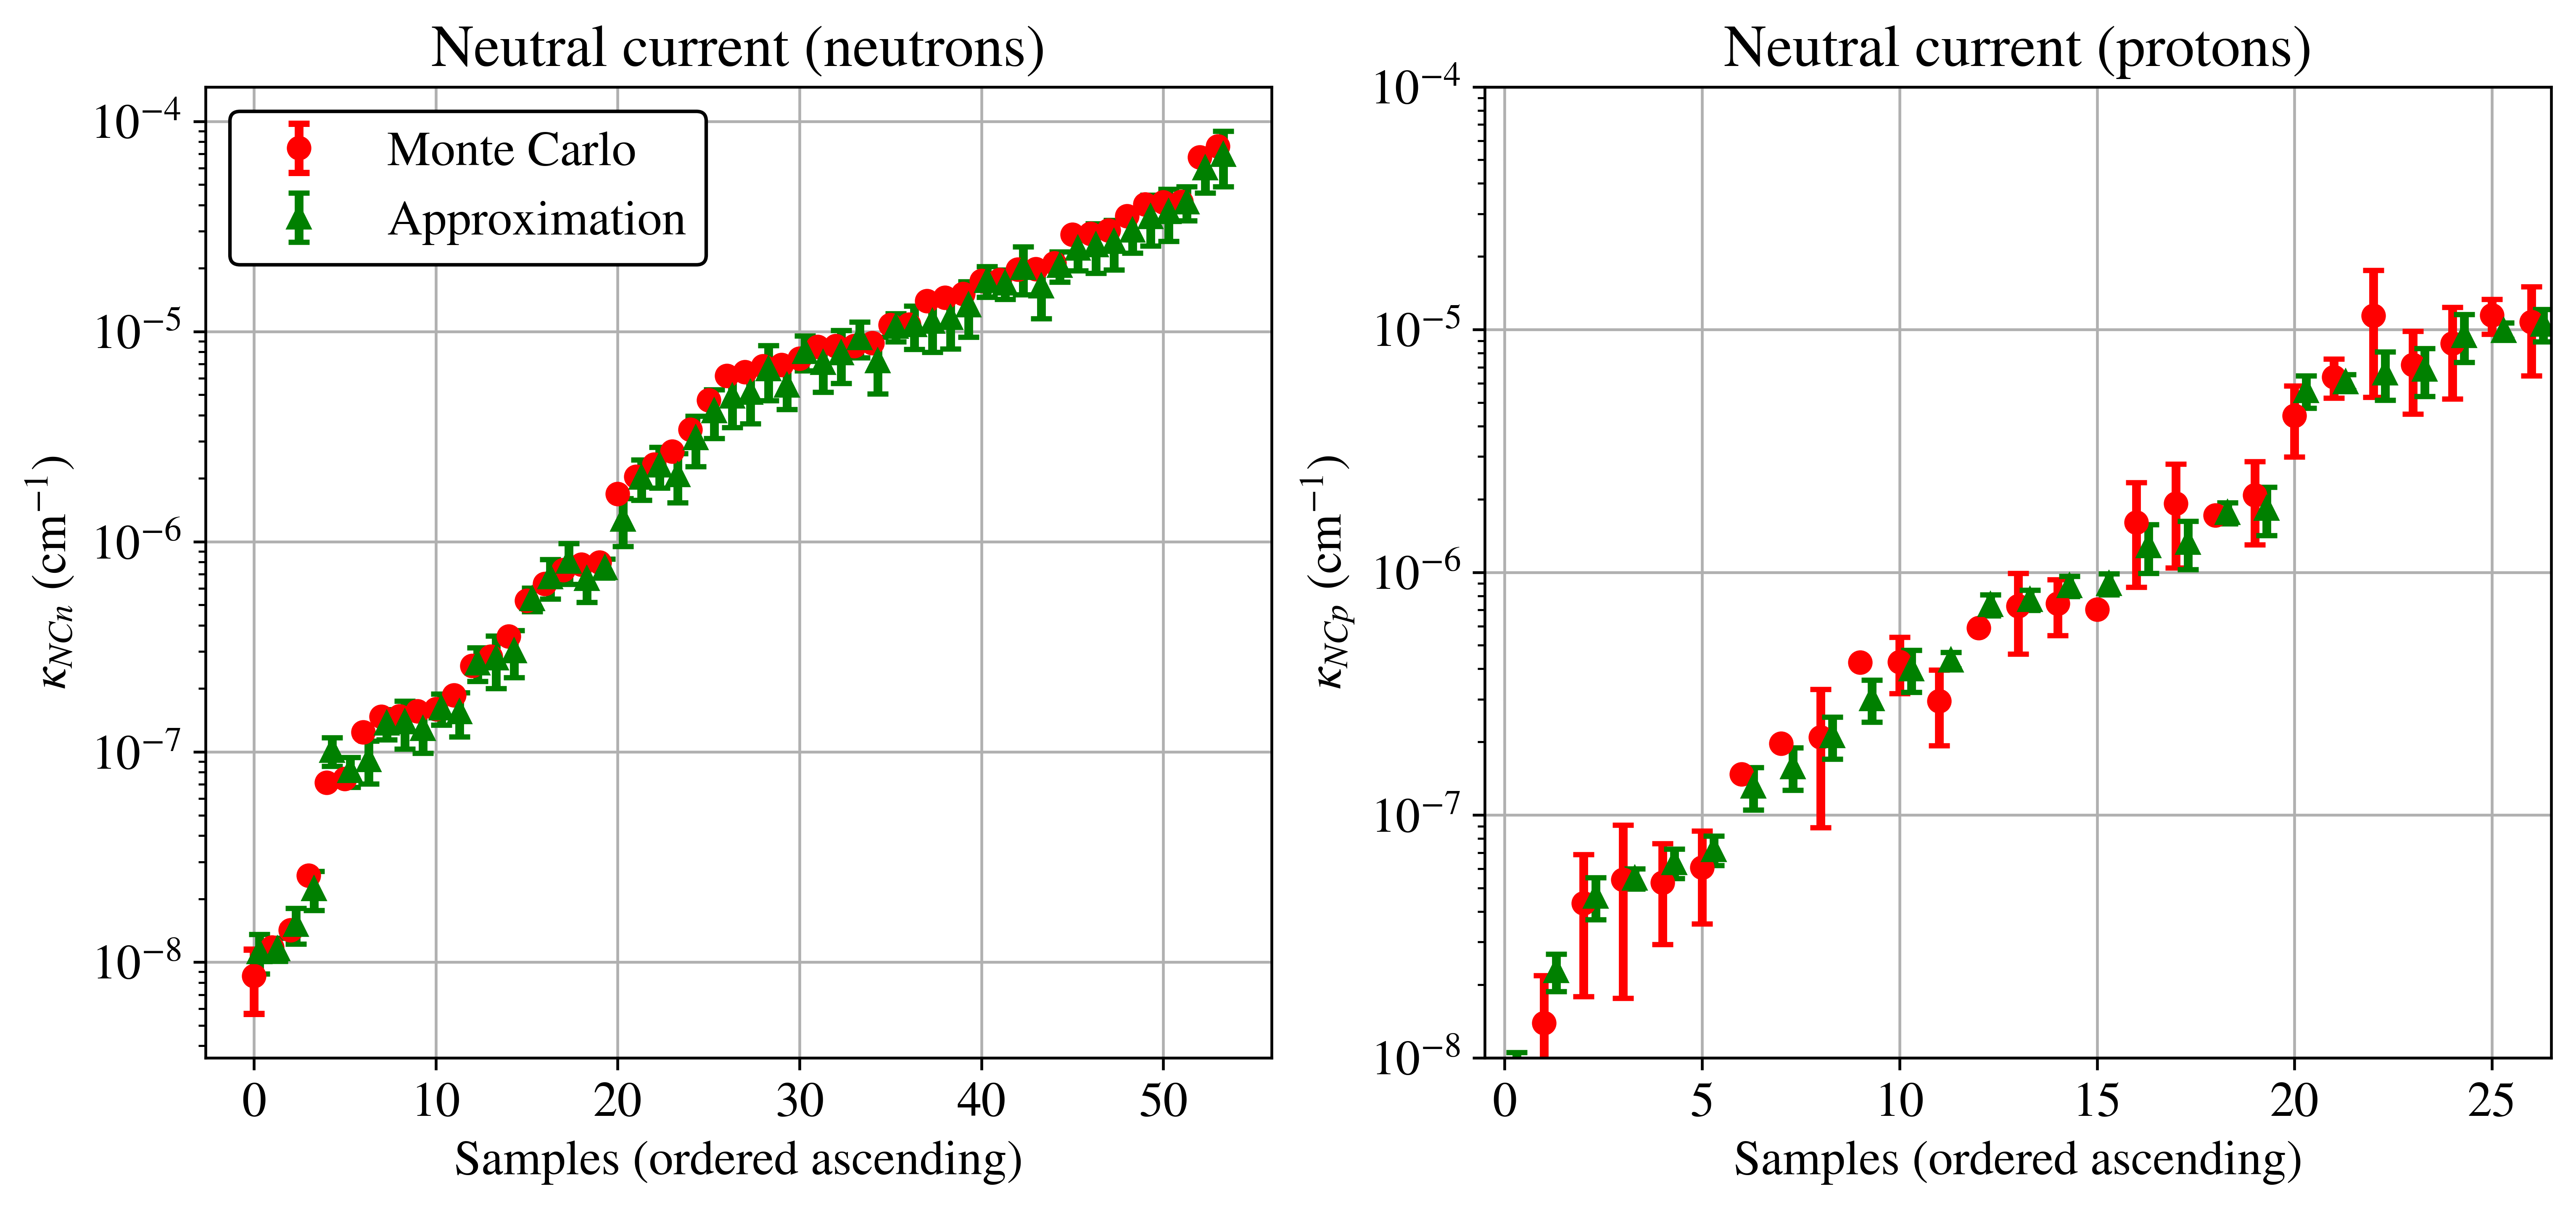

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(54)

test_ix = 2
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]
xpts = range(54) #sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 2], sorted_data[:, 3], fmt = 'ro', capsize = 3, capthick = 1.8)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 11], np.sqrt((sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS) * sorted_data[:, 11], fmt = 'g^', capsize = 3, capthick = 1.5)

chisq_n = (sorted_data[:, 2] - sorted_data[:, 11])**2 / (sorted_data[:, 3]**2 + (sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS * sorted_data[:, 11]**2)

test_ix = 15
sorted_both = ncdata_new[np.argsort(ncdata_new[:, test_ix])] #4
isdegen = np.logical_and(sorted_both[:, 6] - sorted_both[:, 7] > 0, sorted_both[:, 6] < 10**10)
sorted_data = sorted_both[isdegen]

xpts = range(np.sum(isdegen))
ax2.errorbar(xpts, sorted_data[:, 6], sorted_data[:, 7], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], 2 * sorted_data[:, 15], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * 2 * sorted_data[:, 15], fmt = 'g^', capsize = 3, capthick = 1.5)

chisq_p = (sorted_data[:, 6] - 2 * sorted_data[:, 15])**2 / (sorted_data[:, 7]**2 + (sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS * sorted_data[:, 15]**2)

ax1.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')
ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.set_xlim([-0.5, np.sum(isdegen) - 0.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Neutral current (neutrons)')
ax2.set_title('Neutral current (protons)')
#ax1.set_ylim([1e-15, 1e-5])
ax2.set_ylim([1e-8, 1e-4])

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\k'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\k'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\k'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\k'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_268/2598811405.py:9: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_268/2598811405.py:12: SyntaxWarning: invalid escape sequence '\k'
  plt.legend(['Neutrons', 'Protons'], title = '$\kappa_{NC n } $' + f': $\chi^2 / N$ = {nchi:.2f}' + '\n' + '$\kappa_{NC p } $' + f': $\chi^2 / N$ = {pchi:.2f}')
/tmp/ipykernel_268/2598811405.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.legend(['Neutrons', 'Protons'], title = '$\kappa_{NC n } 

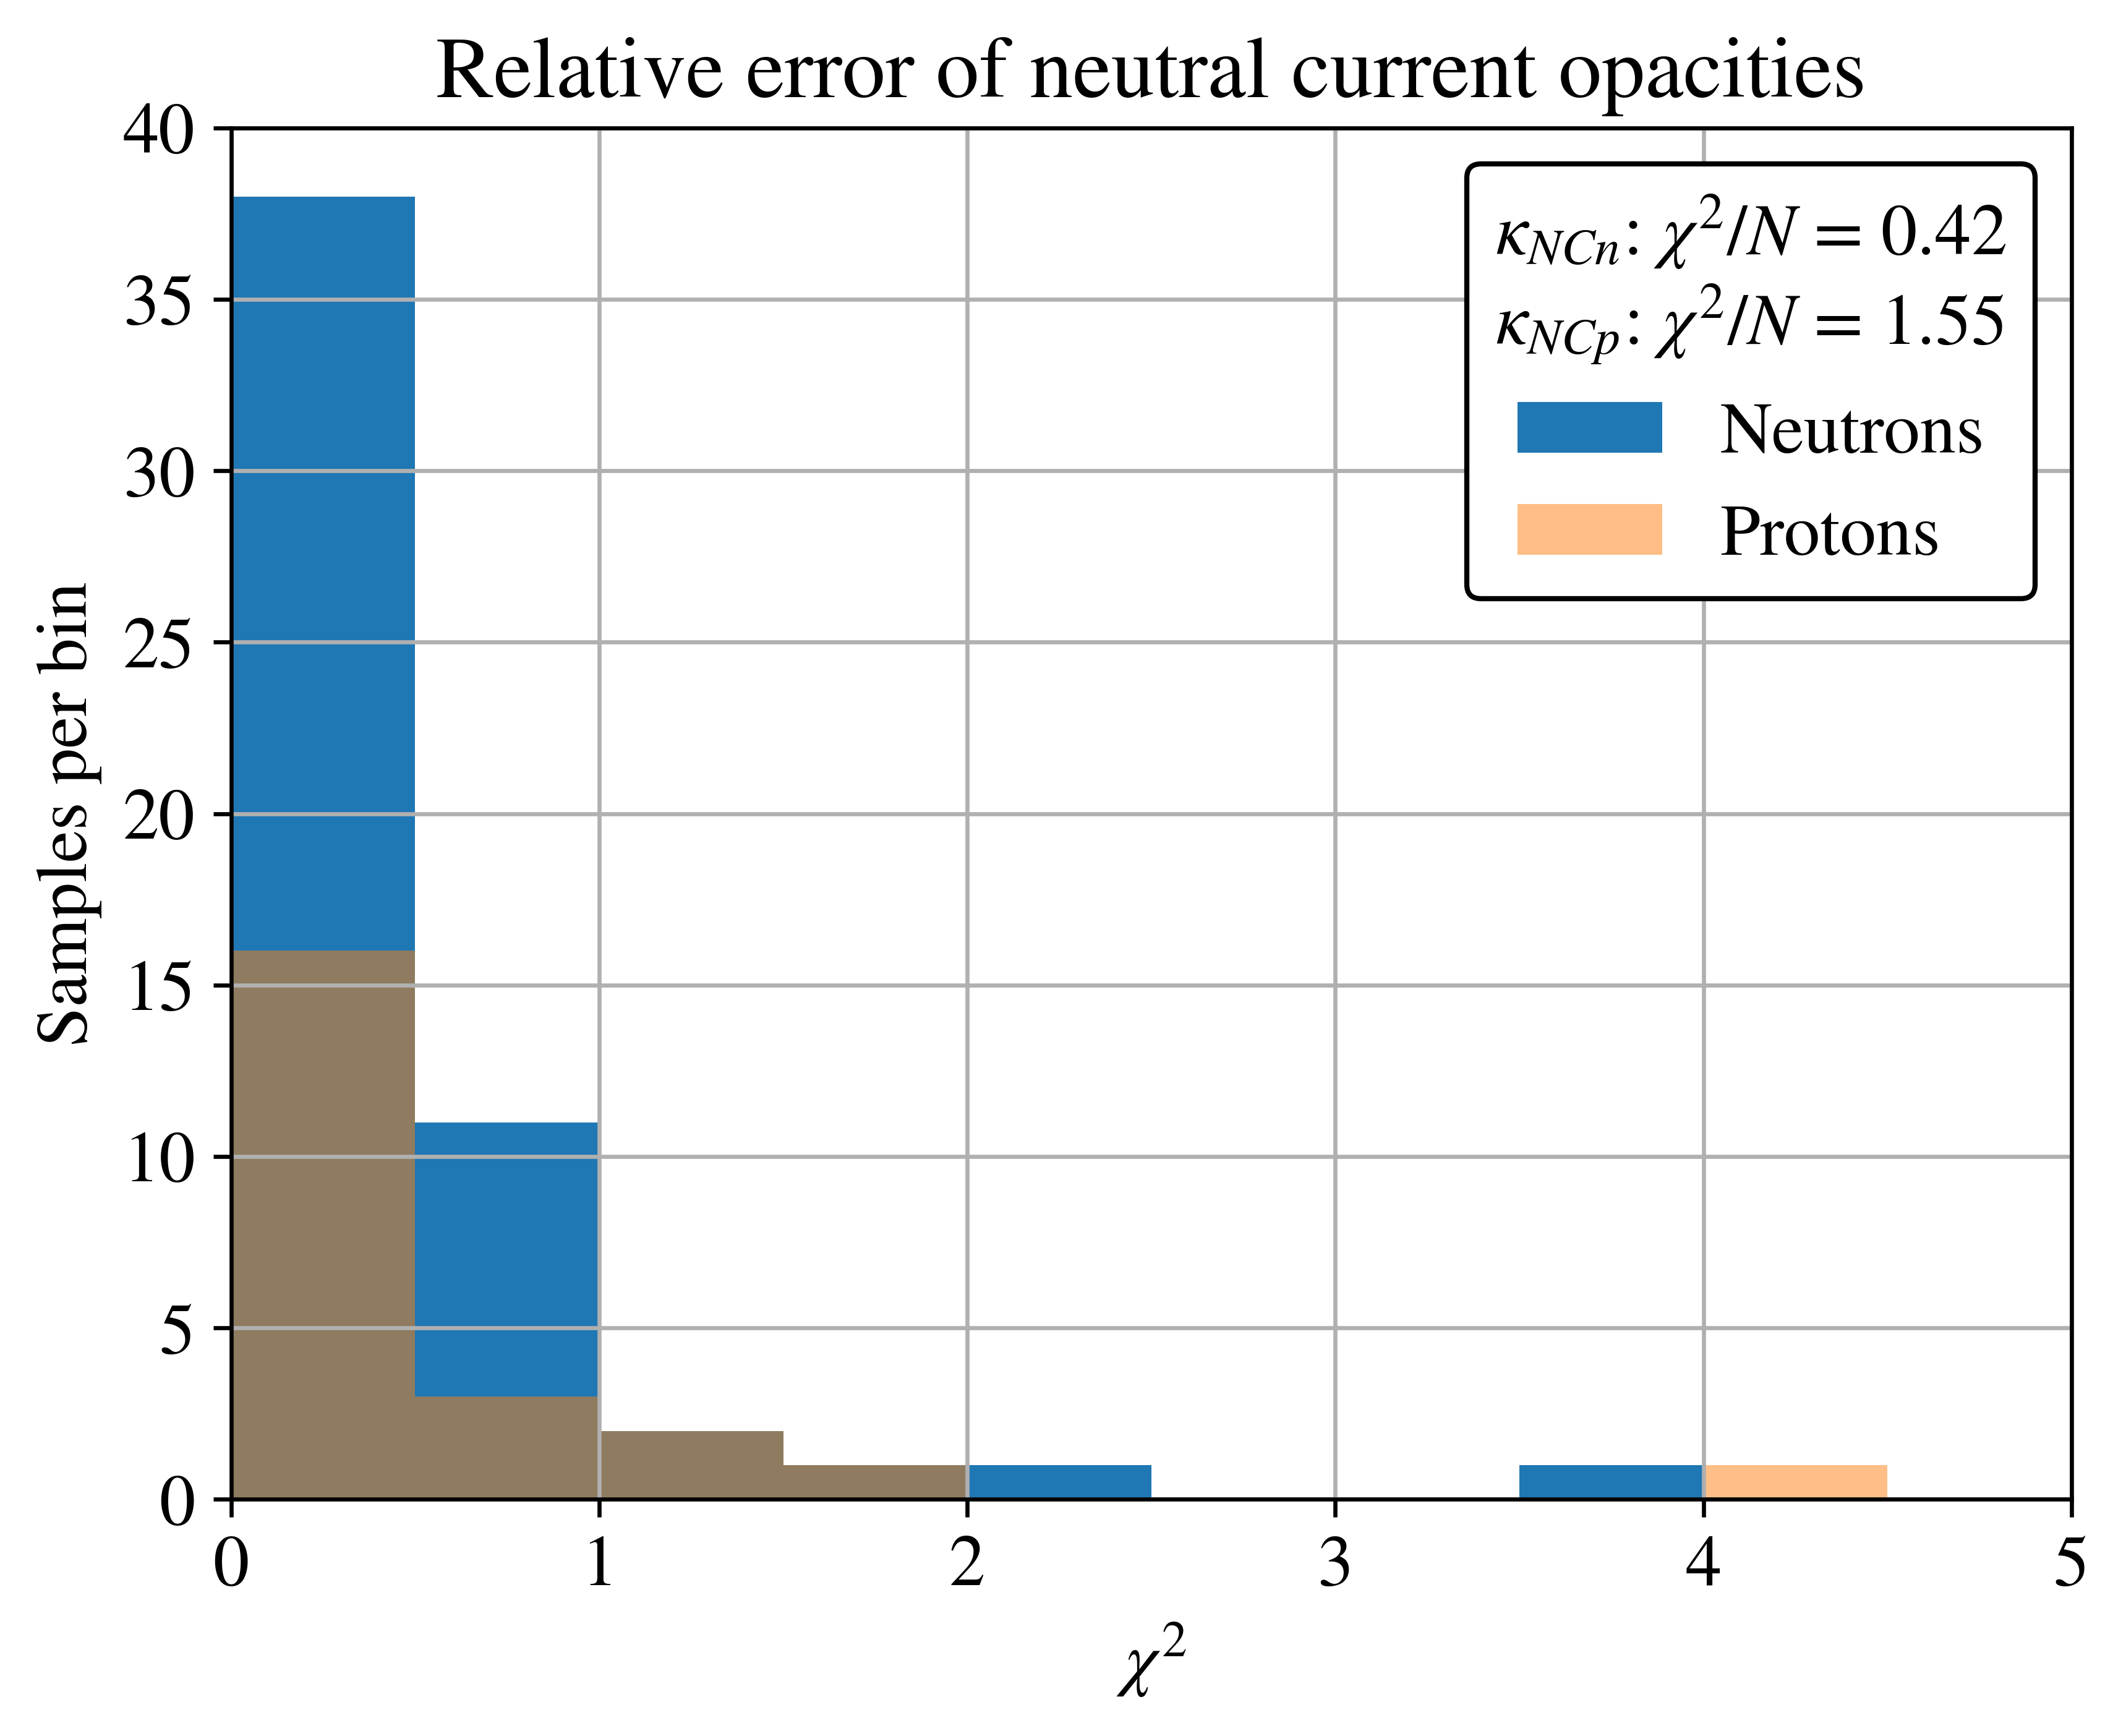

In [65]:
nchi = np.sum(chisq_n) / len(chisq_n)
pchi = np.sum(chisq_p) / len(chisq_p)

plt.hist(chisq_n, bins = 40, range = [0, 20])
plt.hist(chisq_p, bins = 40, range = [0, 20], alpha = 0.5)
plt.xlim([0, 5])
plt.ylim([0, 40])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin')
plt.title('Relative error of neutral current opacities')
plt.legend(['Neutrons', 'Protons'], title = '$\kappa_{NC n } $' + f': $\chi^2 / N$ = {nchi:.2f}' + '\n' + '$\kappa_{NC p } $' + f': $\chi^2 / N$ = {pchi:.2f}')


<>:30: SyntaxWarning: invalid escape sequence '\k'
<>:32: SyntaxWarning: invalid escape sequence '\k'
<>:30: SyntaxWarning: invalid escape sequence '\k'
<>:32: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_268/3524140048.py:30: SyntaxWarning: invalid escape sequence '\k'
  ax[0].set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')
/tmp/ipykernel_268/3524140048.py:32: SyntaxWarning: invalid escape sequence '\k'
  ax[1].set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')


(1e-07, 3e-05)

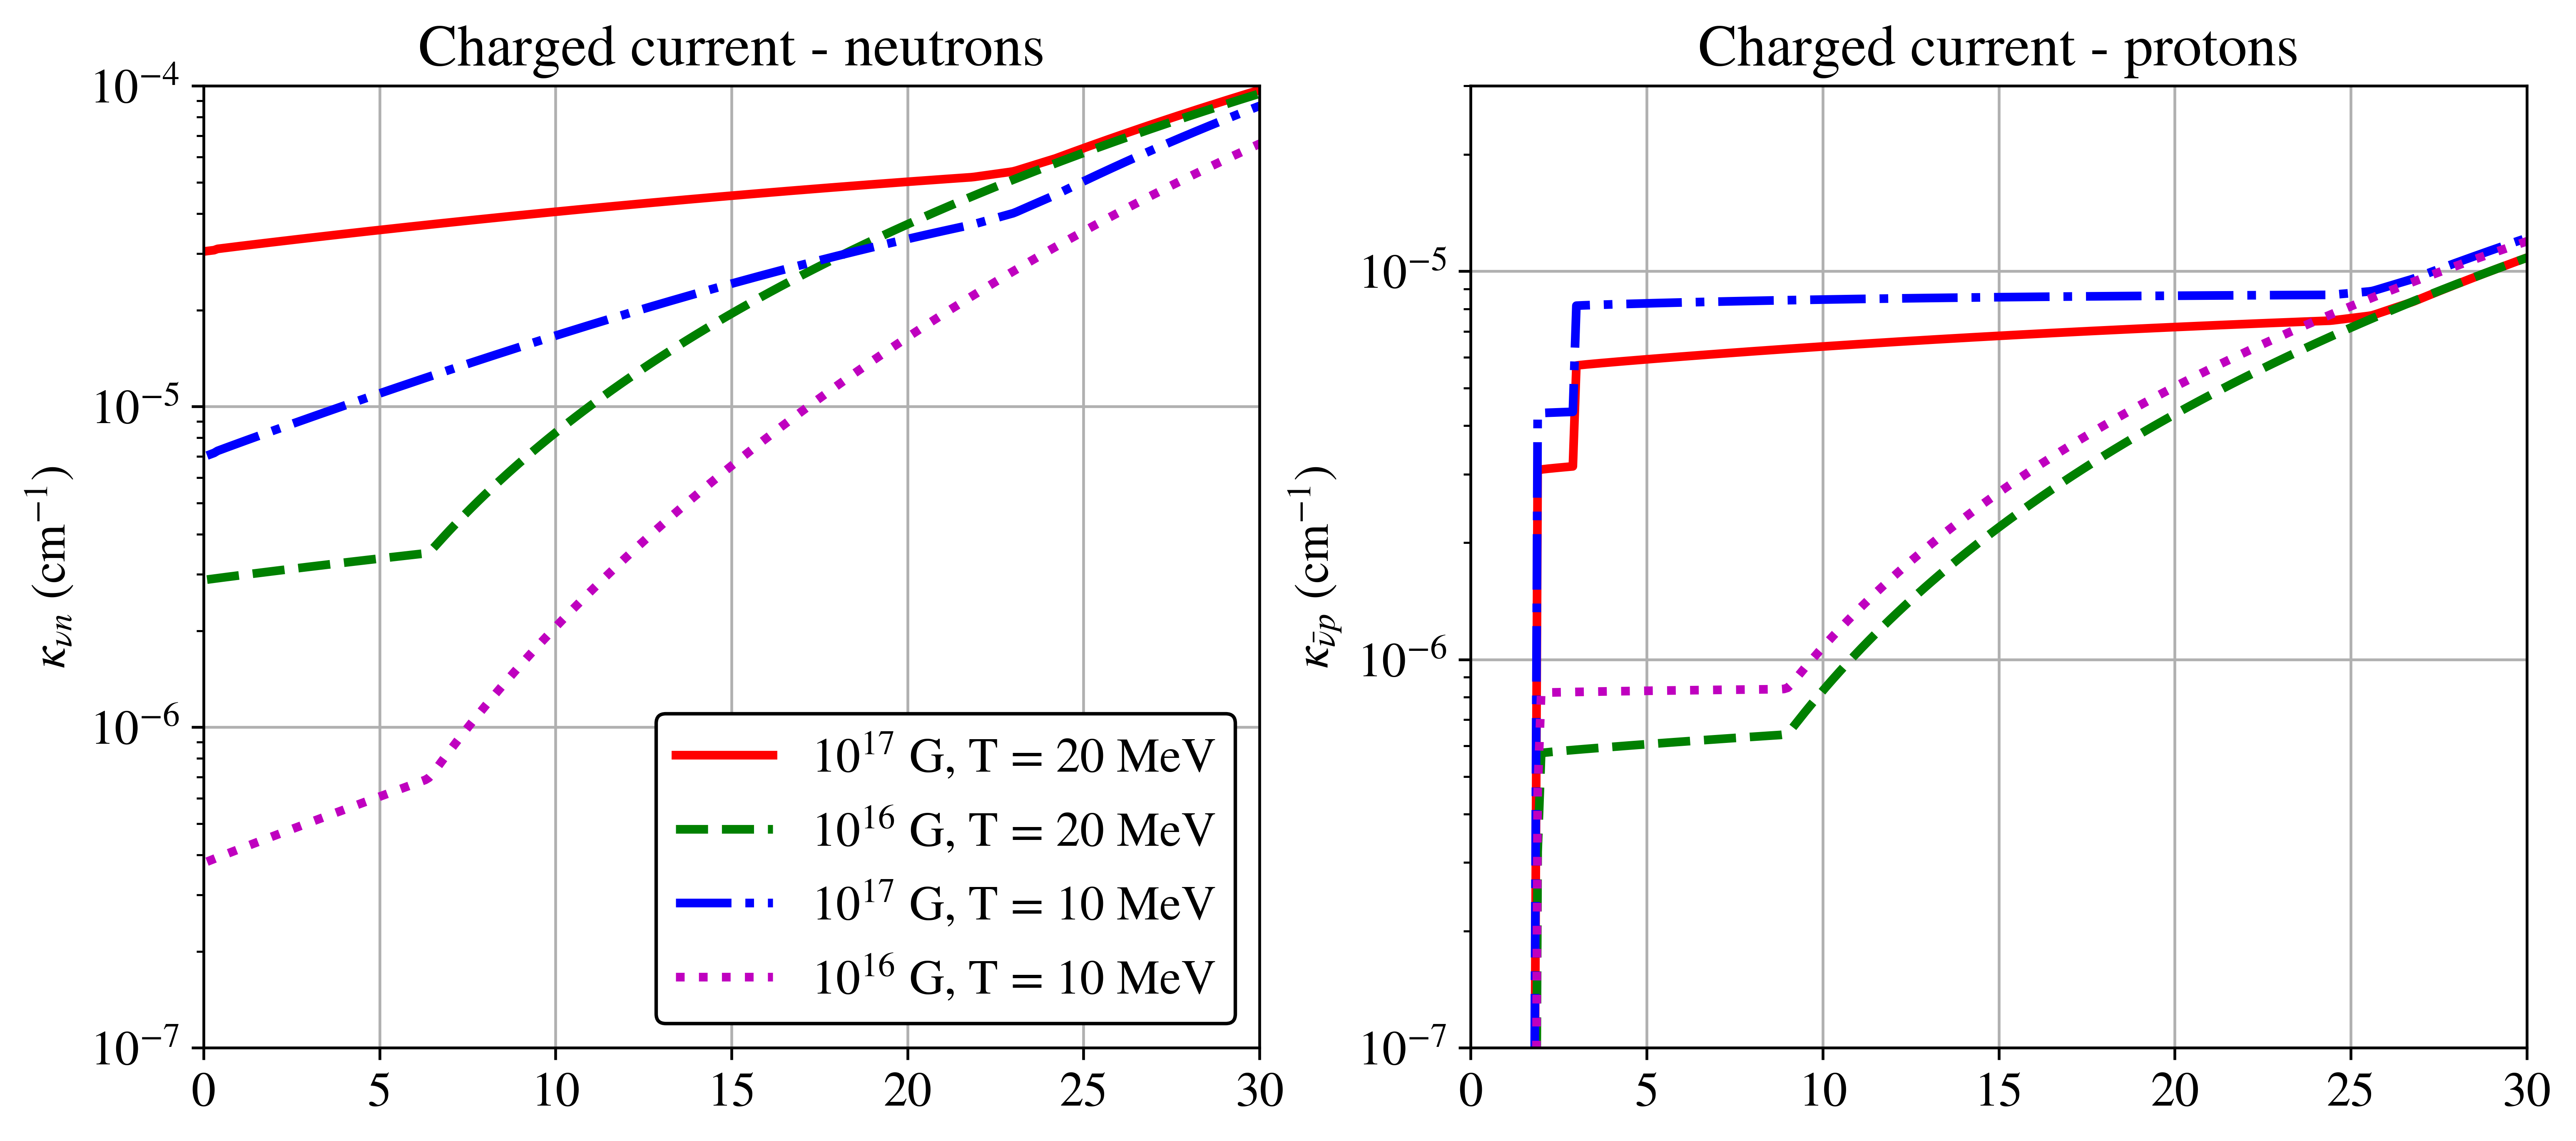

In [75]:
knu = linspace(0.1, 50, 500)
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

cc_plot_data = np.empty((500, 4))
with open('./opacity csvs/plotdatcc.csv', 'r') as file:
    reader = csv.reader(file)
    for ix, row in enumerate(reader):
        cc_plot_data[ix, :] = CC_FACTOR * np.array([float(elt) for elt in row])

ax[0].plot(knu, cc_plot_data[:, 0], 'r-', knu, cc_plot_data[:, 2], 'g--')
ax[1].plot(knu, cc_plot_data[:, 1], 'r-', knu, cc_plot_data[:, 3], 'g--')

cc_plot_data = np.empty((500, 4))
with open('./opacity csvs/plotdatcc2.csv', 'r') as file:
    reader = csv.reader(file)
    for ix, row in enumerate(reader):
        cc_plot_data[ix, :] = CC_FACTOR * np.array([float(elt) for elt in row])

ax[0].plot(knu, cc_plot_data[:, 0], 'b-.', knu, cc_plot_data[:, 2], 'm:')
ax[1].plot(knu, cc_plot_data[:, 1], 'b-.', knu, cc_plot_data[:, 3], 'm:')

ax[0].set_yscale('log')
ax[1].set_yscale('log')

for ax_temp in ax:
    ax_temp.set_xlim([0, 30])
    ax_temp.set_ylabel('$k_\\nu$')
    ax_temp.grid(alpha = 1)

ax[0].set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')
ax[0].set_title('Charged current - neutrons')
ax[1].set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')
ax[1].set_title('Charged current - protons')

ax[0].legend(['$10^{17}$ G, T = 20 MeV', '$10^{16}$ G, T = 20 MeV', '$10^{17}$ G, T = 10 MeV', '$10^{16}$ G, T = 10 MeV'])
ax[0].set_ylim([1e-7, 1e-4])
ax[1].set_ylim([1e-7, 3e-5])


<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_268/538875961.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\cos \\theta_\\nu$')
/tmp/ipykernel_268/538875961.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('opacity (normalized to $\cos \\theta_\\nu = 0$)')


Text(0.5, 1.0, 'Anisotropies in scattering rates')

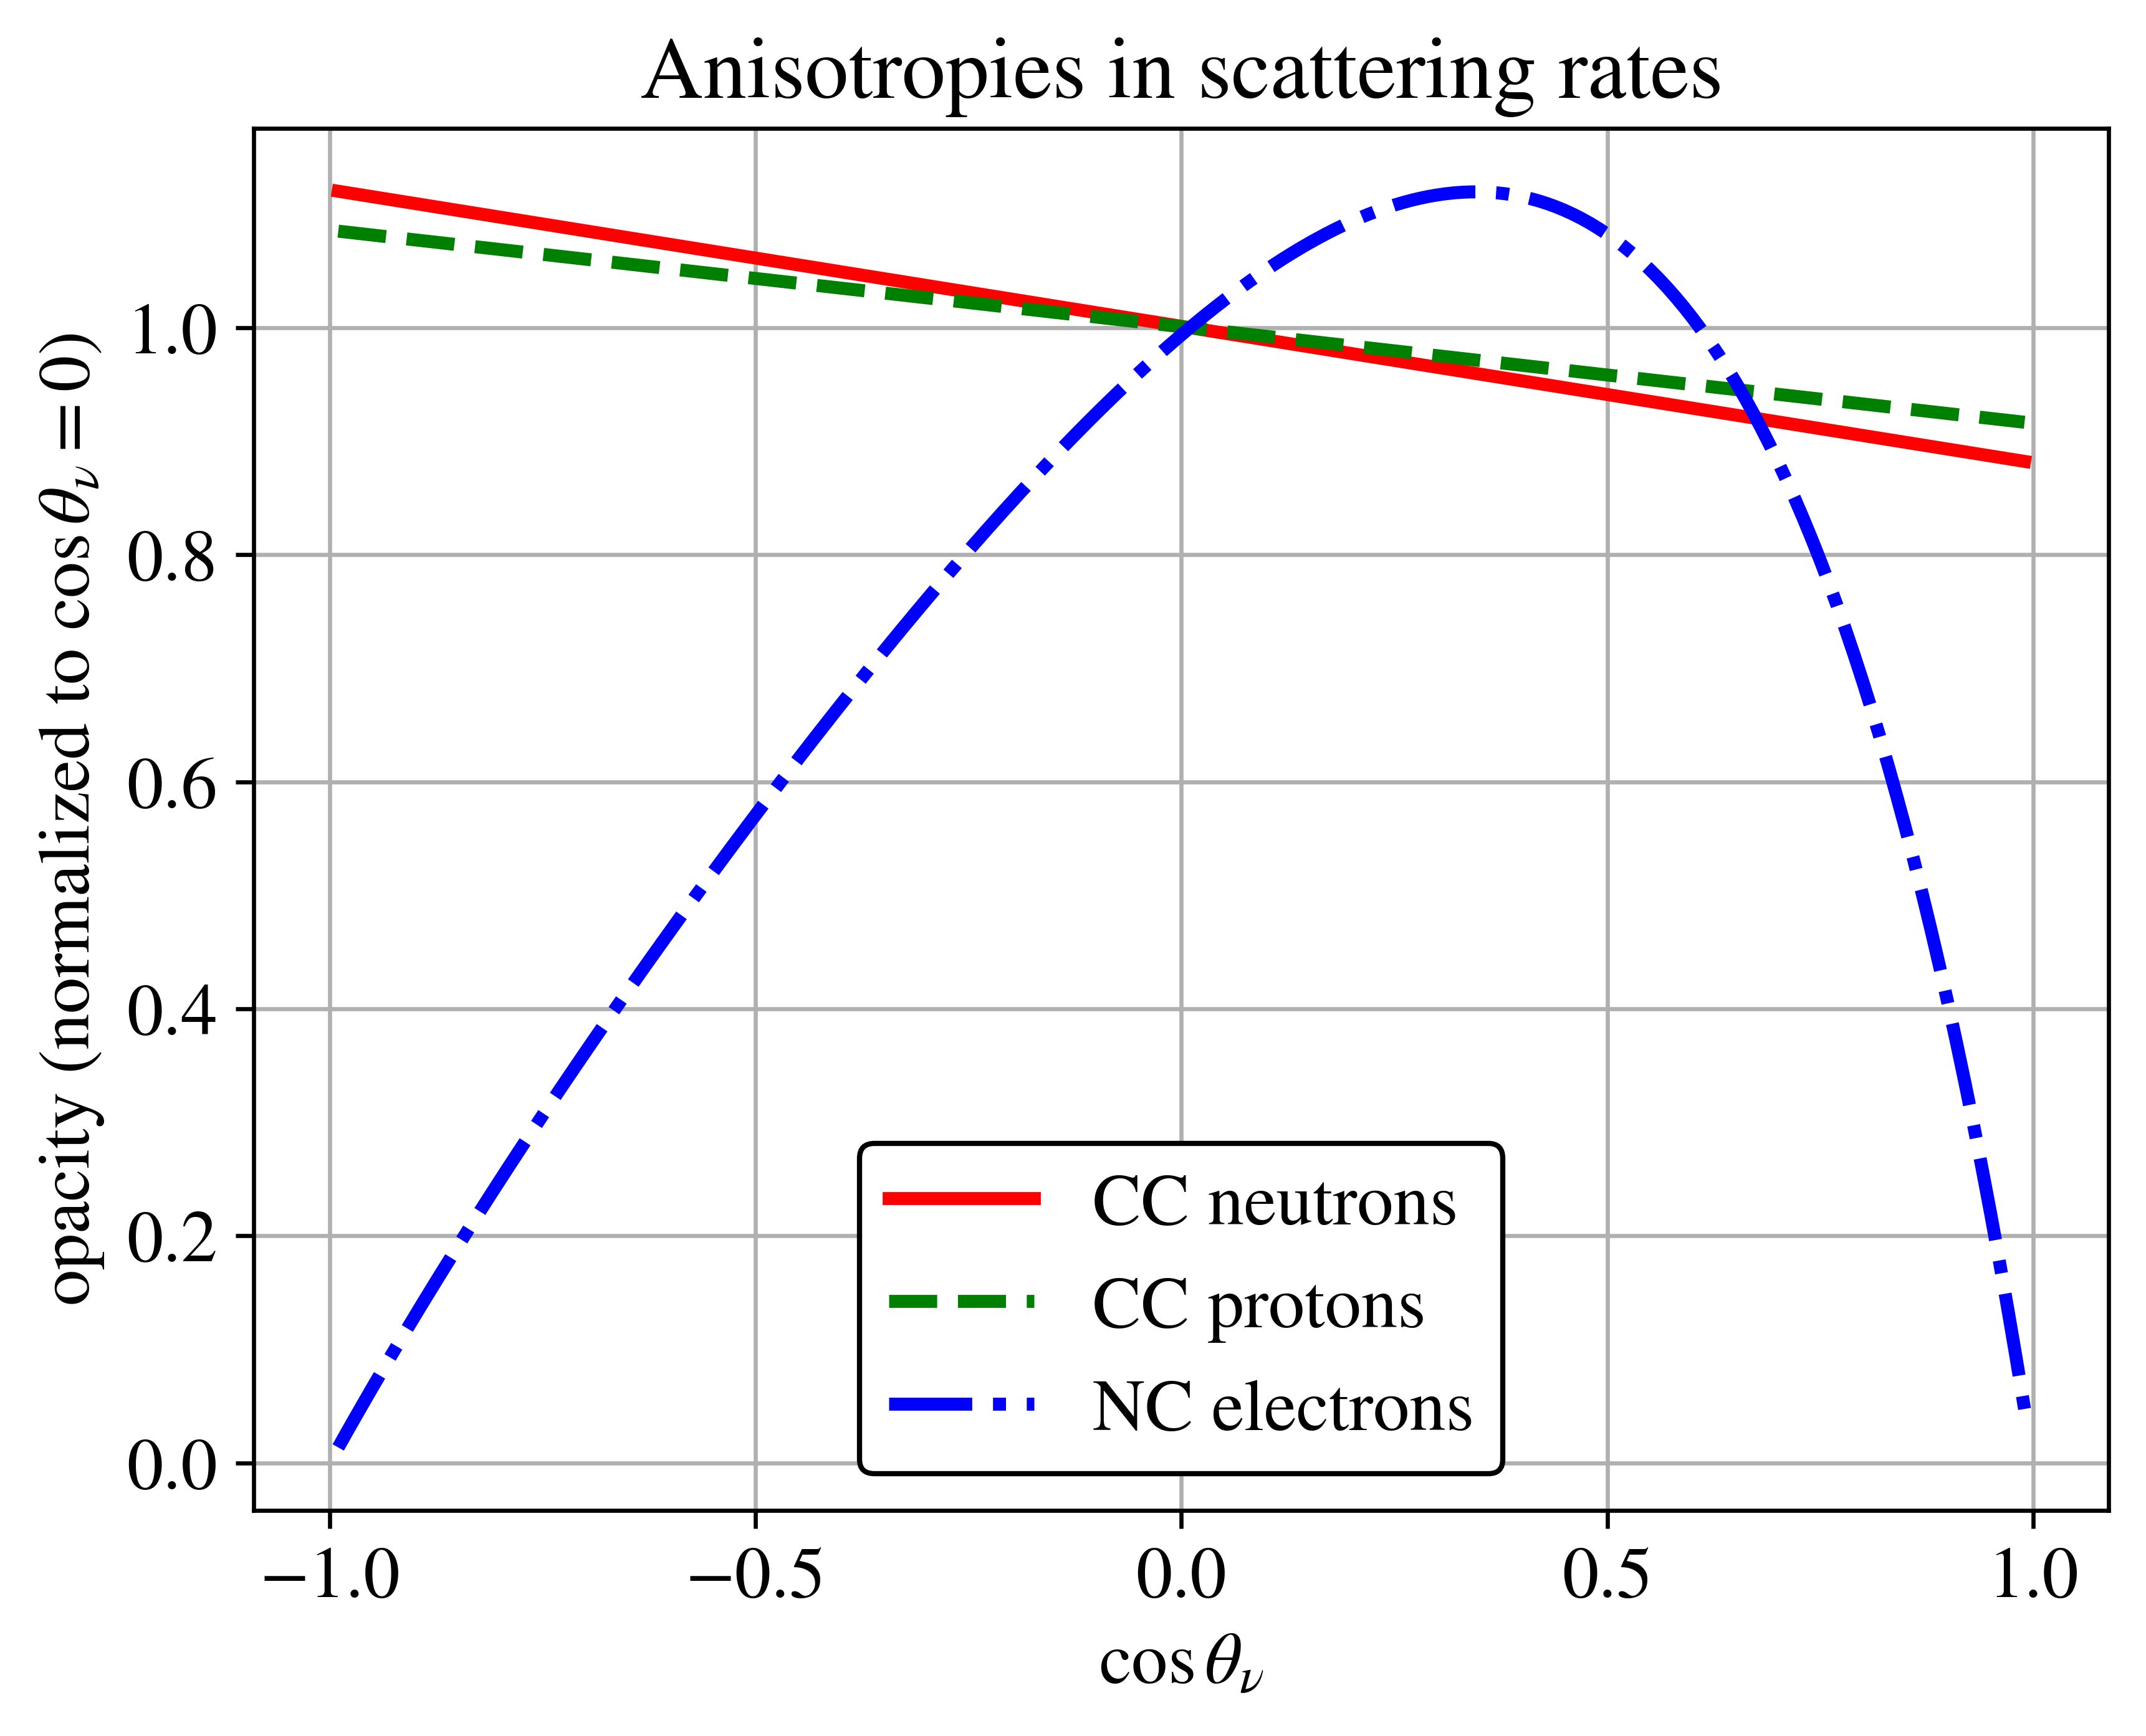

In [ ]:
angle_data = np.empty((199, 4))
with open('./opacity csvs/plotdatangles.csv', 'r') as file:
    reader = csv.reader(file)
    for ix, row in enumerate(reader):
        angle_data[ix, :] = [float(elt) for elt in row]

ct_space = linspace(-0.99, 0.99, 199)
plt.plot(ct_space, angle_data[:, 0] / angle_data[100, 0], 'r-', ct_space, angle_data[:, 1] / angle_data[100, 1], 'g--', 
    ct_space, angle_data[:, 3] / angle_data[100, 3], 'b-.')
plt.grid(True)
plt.legend(['CC neutrons', 'CC protons', 'NC electrons'])
plt.xlabel('$\cos \\theta_\\nu$')
plt.ylabel('opacity (normalized to $\cos \\theta_\\nu = 0$)')
plt.title('Anisotropies in scattering rates')

In [112]:
from importlib import reload
reload(mo)

<module 'magopacitiesmlk' from '/home/mia/Documents/GitHub/HEA-neutrinos/src/magopacitiesmlk.py'>

<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_687/181857934.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\cos \\theta_\\nu$')
/tmp/ipykernel_687/181857934.py:18: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('opacity (normalized to $\cos \\theta_\\nu = 0$)')


Text(0.5, 1.0, 'Anisotropies in scattering rates')

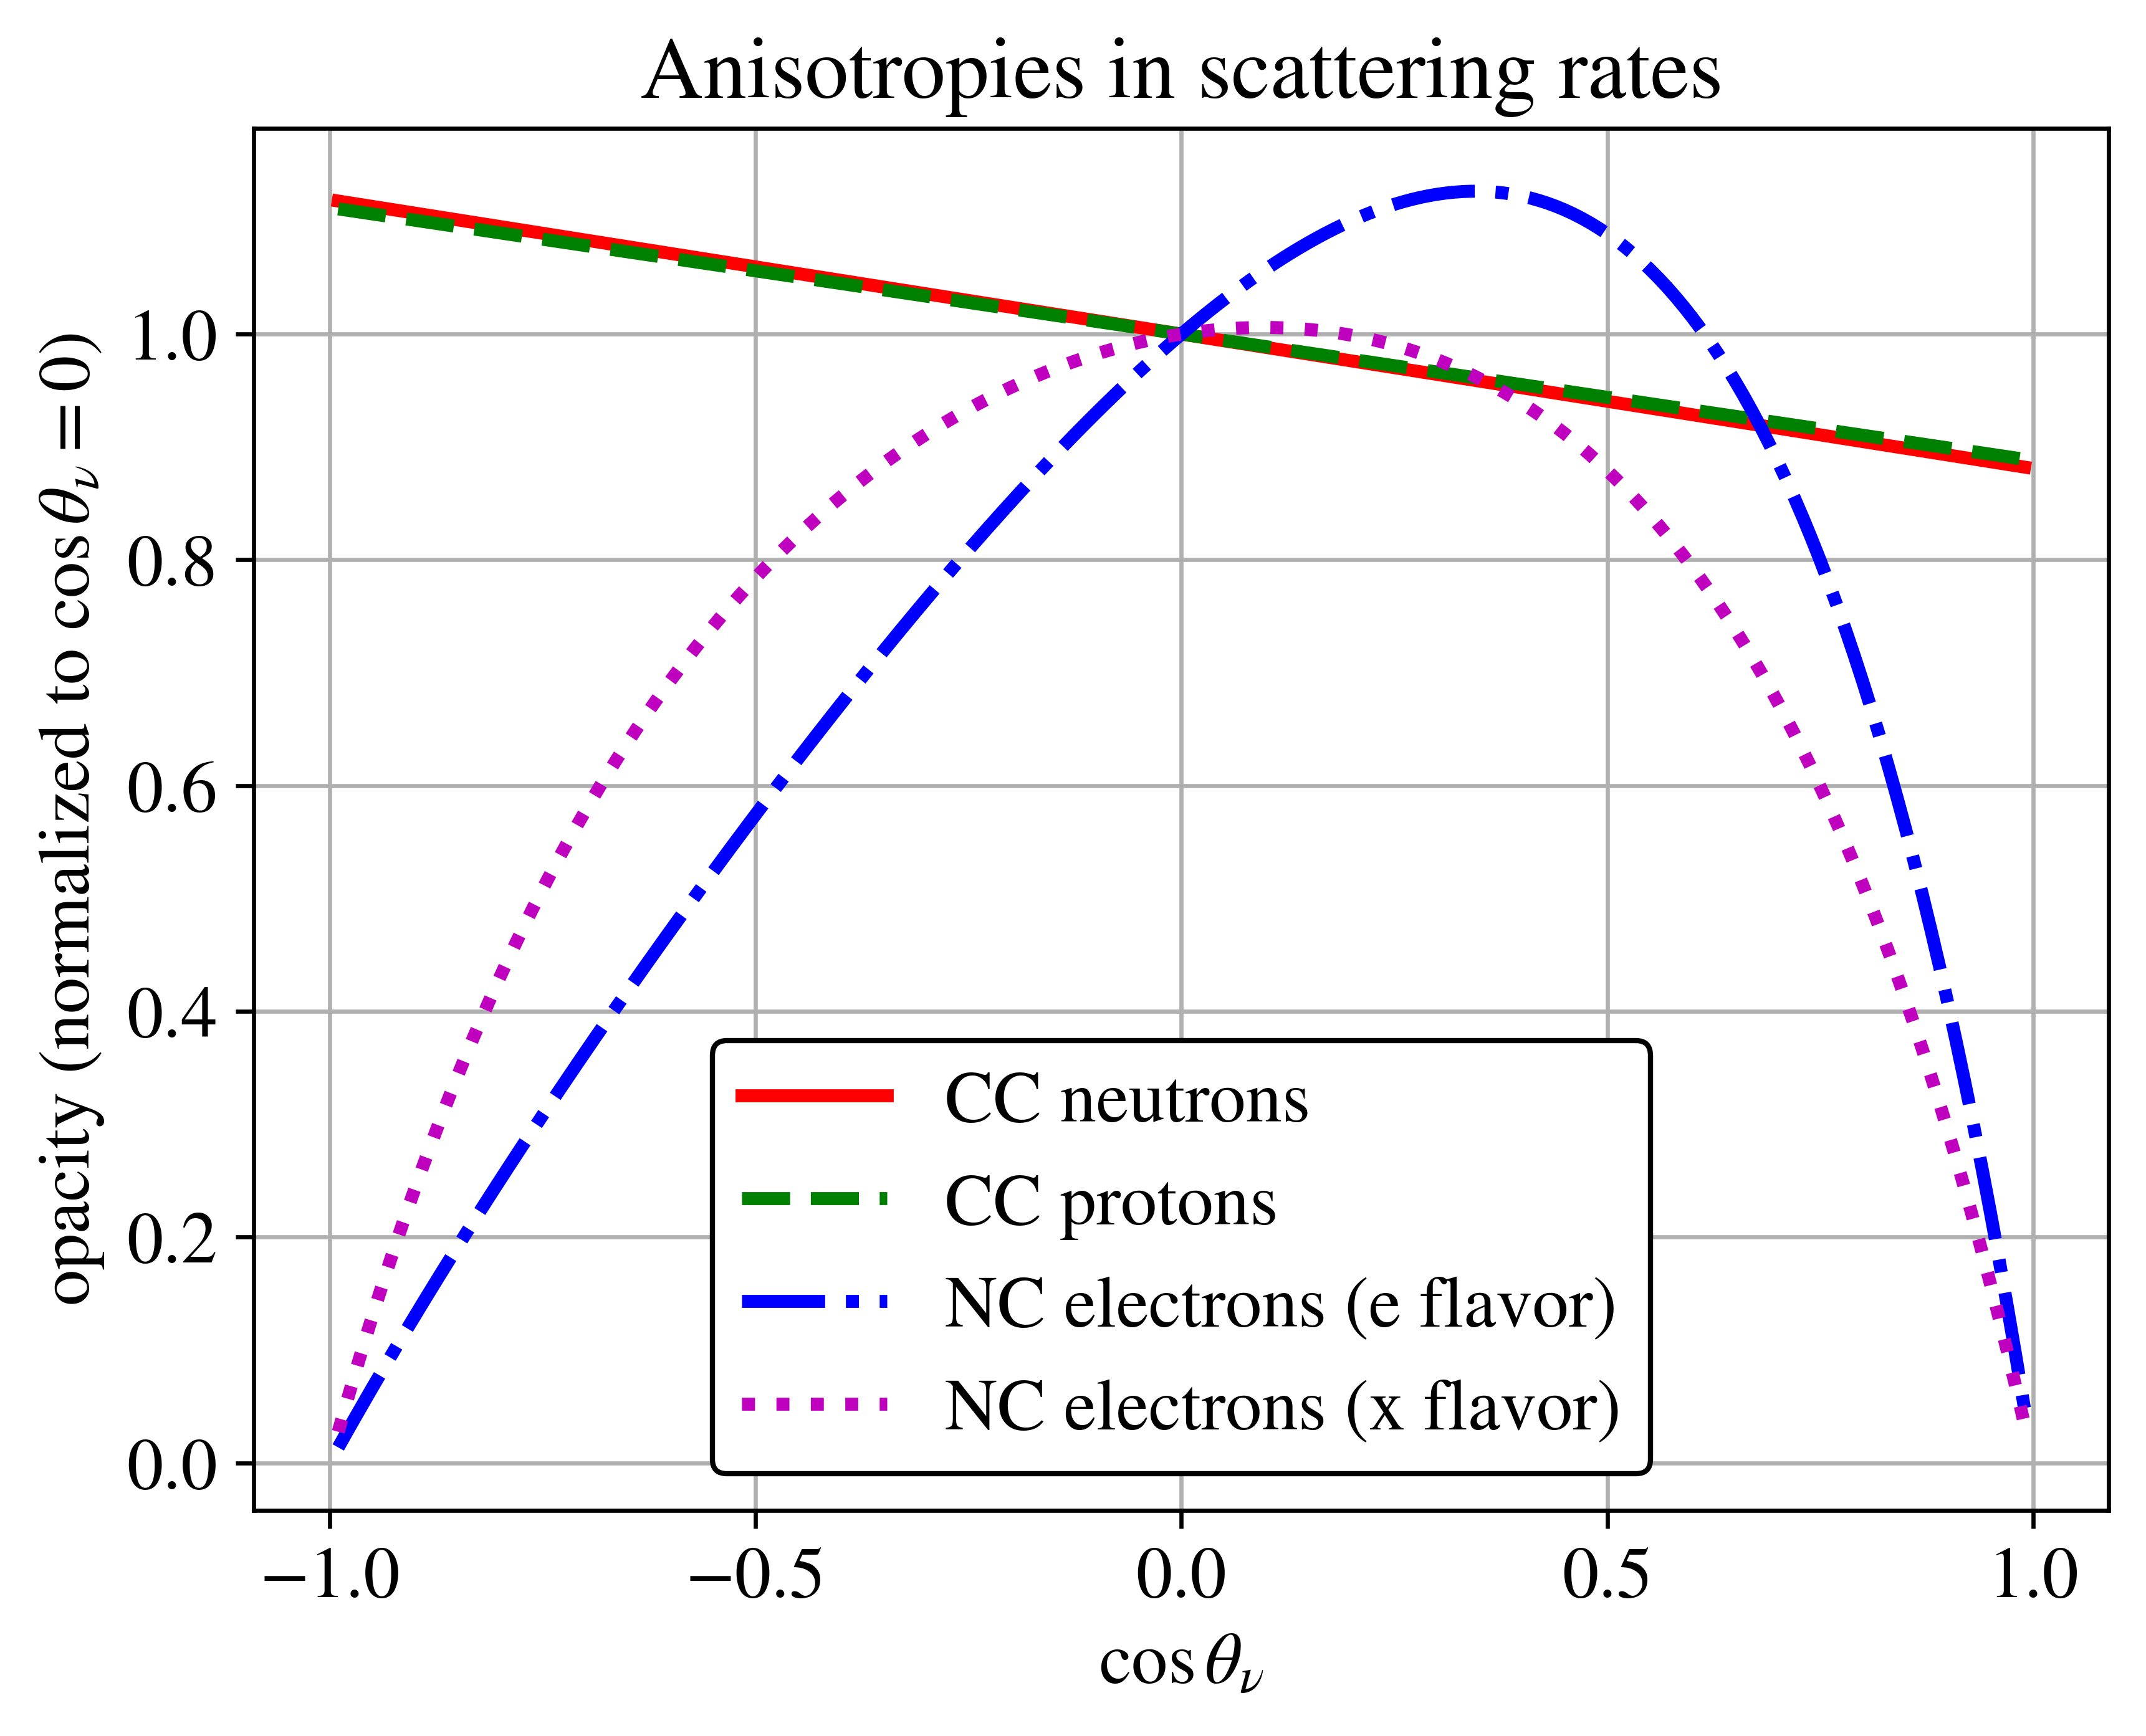

In [114]:
eb = 100 * G15_TO_FM
t = 20 / HBARC
nb = 0.16 * 10**-2
yp = 0.1

ct_space = linspace(-0.99, 0.99, 199)
mue = mo.mue_of_n(nb * yp, eb, t)

ccn = [mo.kappan(eb, t, mue, nb, yp, 10 / HBARC, ct, 0) / mo.kappan(eb, t, mue, nb, yp, 10 / HBARC, 0, 0) for ct in ct_space]
ccp = [mo.kappap(eb, t, mue, nb, yp, 10 / HBARC, ct, 0) / mo.kappap(eb, t, mue, nb, yp, 10 / HBARC, 0, 0) for ct in ct_space]
nce = [mo.kappae_nc(eb, t, mue, 10 / HBARC, ct, False) / mo.kappae_nc(eb, t, mue, 10 / HBARC, 0, False) for ct in ct_space]
ncex = [mo.kappae_nc(eb, t, mue, 10 / HBARC, ct, True) / mo.kappae_nc(eb, t, mue, 10 / HBARC, 0, True) for ct in ct_space]

plt.plot(ct_space, ccn, 'r-', ct_space, ccp, 'g--', ct_space, nce, 'b-.', ct_space, ncex, 'm:')
plt.grid(True)
plt.legend(['CC neutrons', 'CC protons', 'NC electrons (e flavor)', 'NC electrons (x flavor)'])
plt.xlabel('$\cos \\theta_\\nu$')
plt.ylabel('opacity (normalized to $\cos \\theta_\\nu = 0$)')
plt.title('Anisotropies in scattering rates')

<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_973/1778184442.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\cos \\theta_q$')


(-1.0, 1.0)

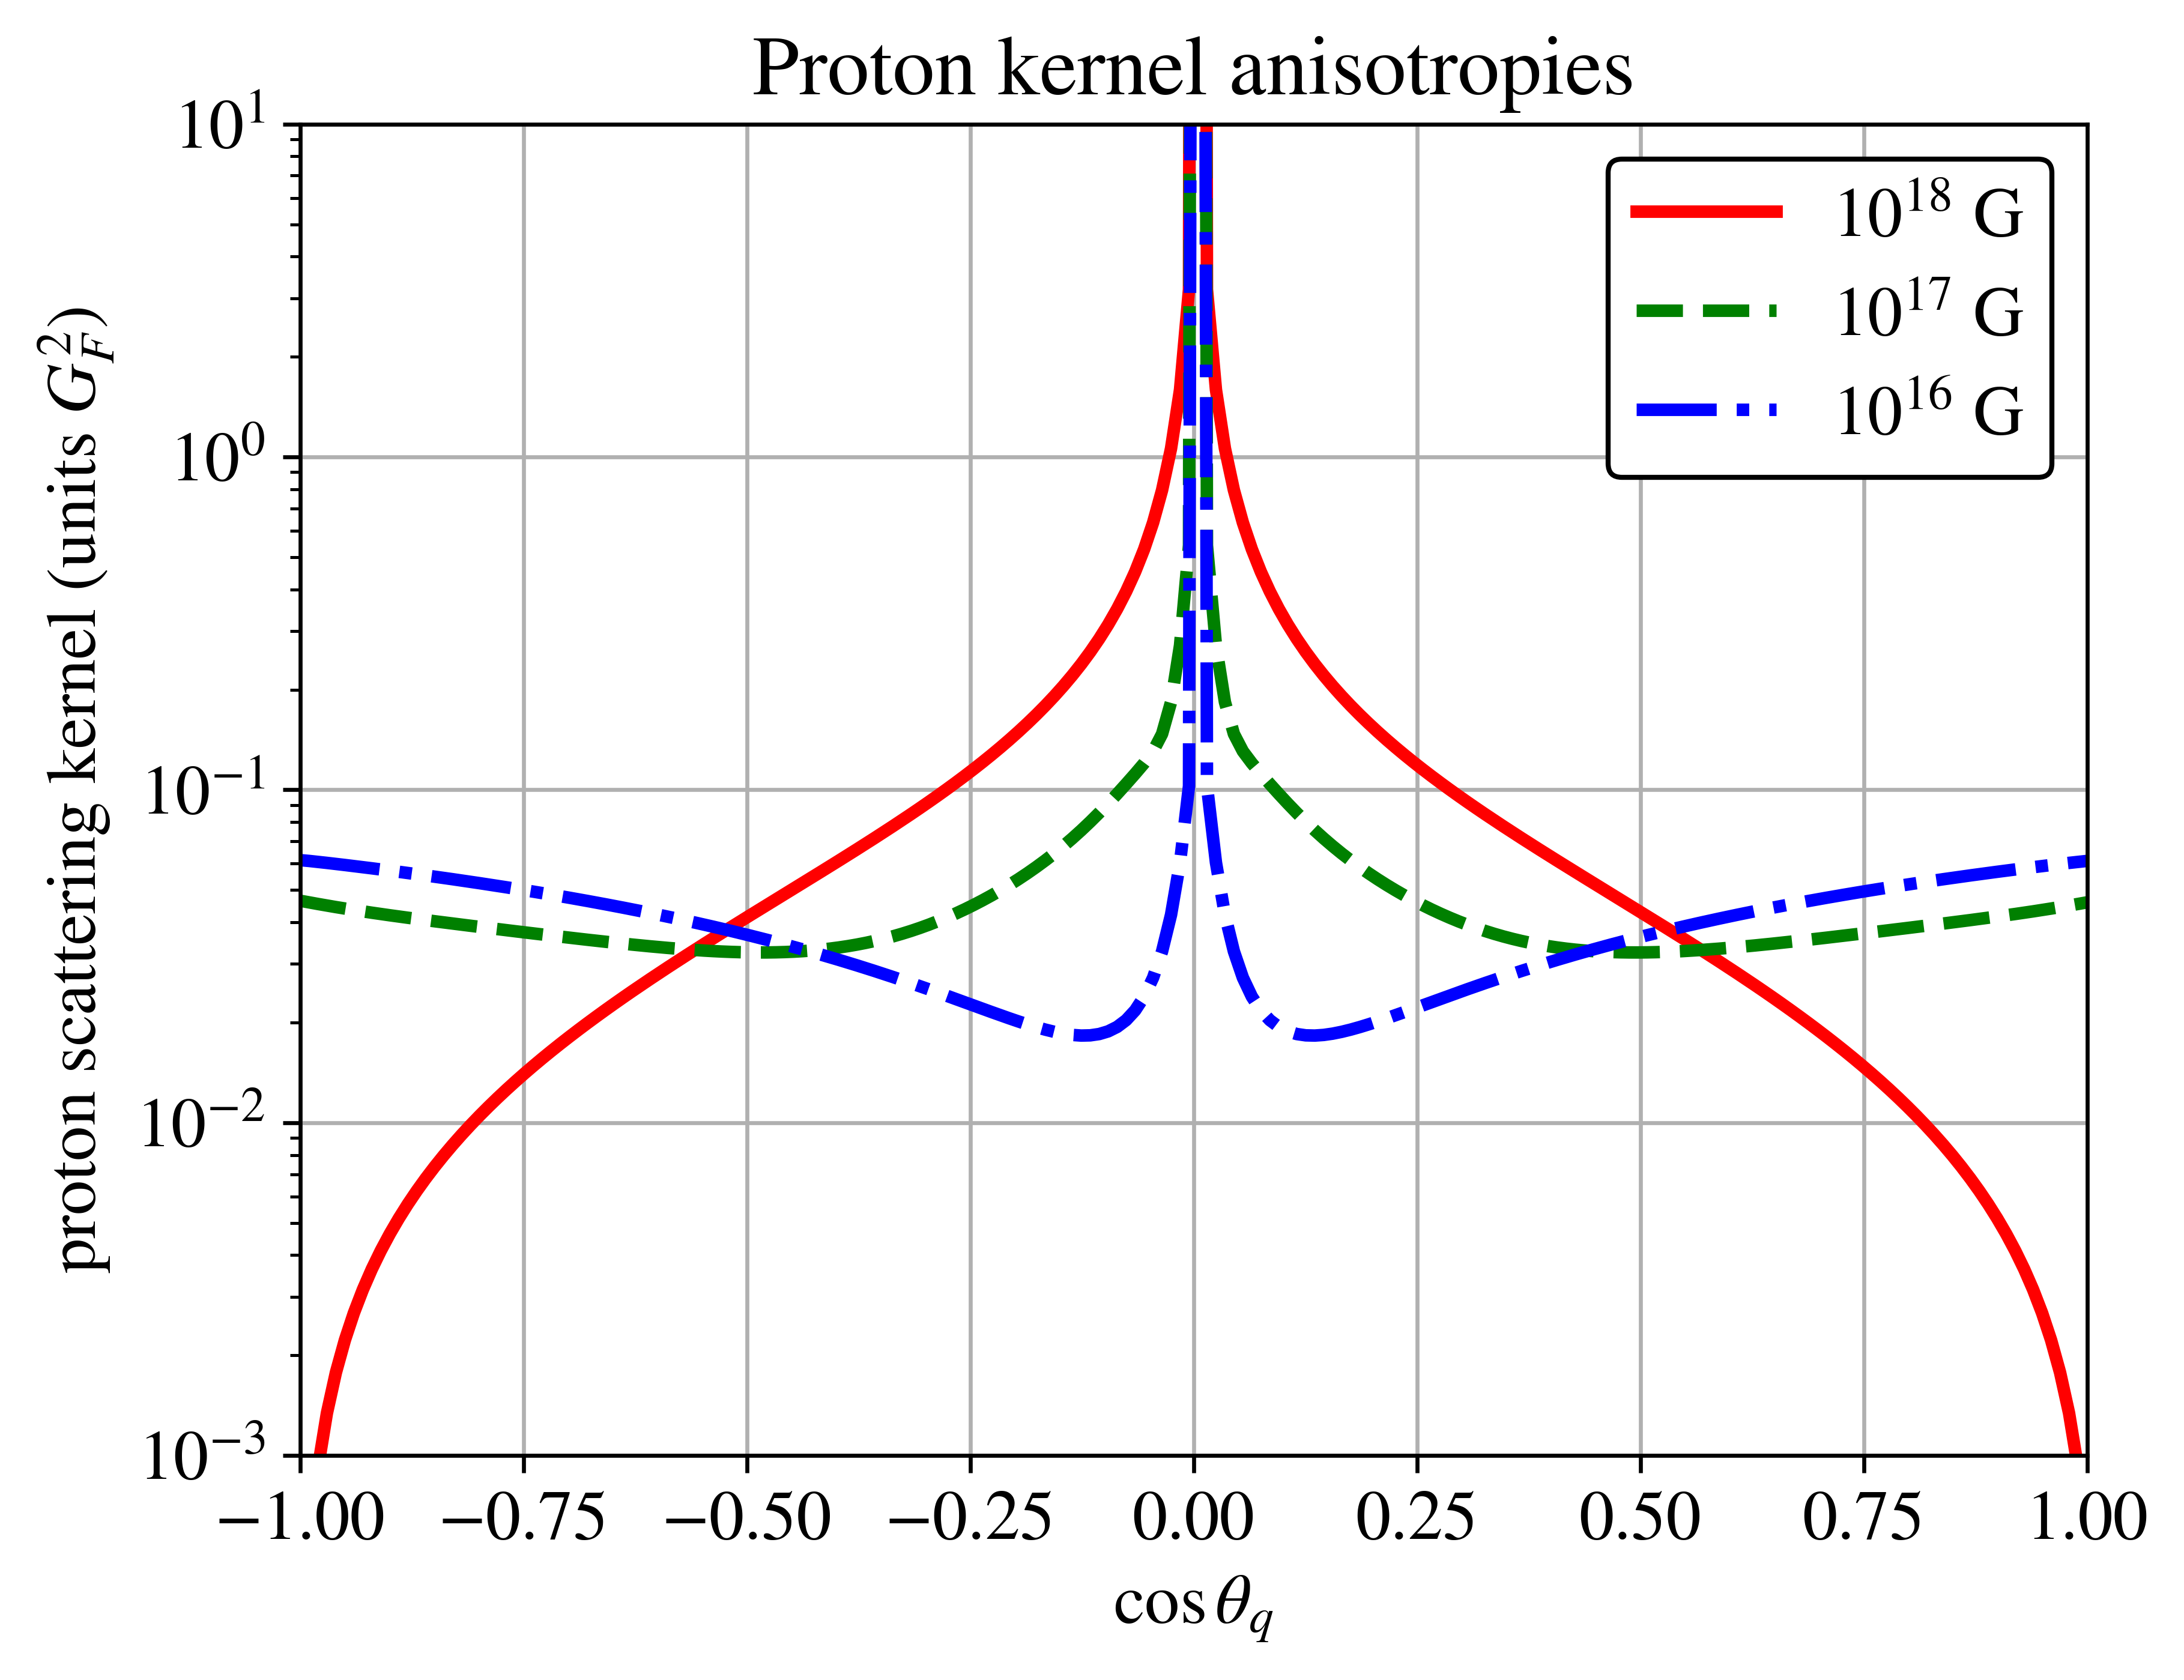

In [10]:
kern_data = np.empty((200, 3))
with open('./opacity csvs/pkern.csv', 'r') as file:
    reader = csv.reader(file)
    for ix, row in enumerate(reader):
        kern_data[ix, :] = [float(elt) for elt in row]

ct_space = linspace(-1, 1, 200)
plt.plot(ct_space, kern_data[:, 0], 'r-', ct_space, kern_data[:, 1], 'g--', 
    ct_space, kern_data[:, 2], 'b-.')
plt.grid(True)
plt.legend(['$10^{18}$ G', '$10^{17}$ G', '$10^{16}$ G'])
plt.xlabel('$\cos \\theta_q$')
plt.ylabel('proton scattering kernel (units $G_F^2$)')
plt.title('Proton kernel anisotropies')
plt.yscale('log')
plt.ylim([1e-3, 10])
plt.xlim([-1, 1])